<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-weight: bold;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>
<div class="title">Exploratory Data Analysis and Predictive Modeling for Stroke Risk Prediction</div>

#
<style>
.border{
  color: white;
  font-weight: 550;
  font-size: 25px;
  font-family: Arial, Helvetica, sans-serif;
  padding: 15px;
  justify-content: center;
  box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
  display: flex;
  max-width: 95%;
  margin:0 auto;
  height: 40px;
  border-radius: 50px;
  transition: top ease 0.5s;
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  top: 5px;
}
.border-important {
  /* background: #fe346e; */
  background-color: #fe346e;
}
.border:hover{
  box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
  top: 0px
}
</style>
<div class="border border-important">1. Data Wrangling</div>


<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">1.1 Import Necessary Libraries</div>

In [1]:
from sharedFunctions import *
import missingno as msno
from pywaffle import Waffle
from ydata_profiling import ProfileReport

%matplotlib inline

<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">1.2 Load Dataset</div>

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

#
<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">1.3 Data Profiling</div>

In [4]:
# Data Profiling
def plot_data_report(df, title="Data Report"):
    """
    Function to plot the data profiling
    
    Parameters:
        df: The DataFrame to generate the profile report.
        title: The title of the profile report. Default is "Data Report".
    
    Returns:
        Tuple: A tuple containing the profile report, list of categorical variables, and list of numerical variables.
    """
    profile = ProfileReport(df, title=title, correlations={"auto": {"calculate": False}})
    
    # Retrieve the description of the profile
    description = profile.get_description()
    
    # Extract variable types from the profile dictionary
    variables = description.variables
    
    # Extract categorical and numerical variables
    categorical_list = [col for col, data in variables.items() if data['type'] == 'Categorical']
    numerical_list = [col for col, data in variables.items() if data['type'] == 'Numeric']
    
    profile.to_notebook_iframe()
    
    return categorical_list, numerical_list

cat_col, num_col = plot_data_report(df, title="Health Stroke Dataset Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">1.4 Visualizing Missing Values</div>

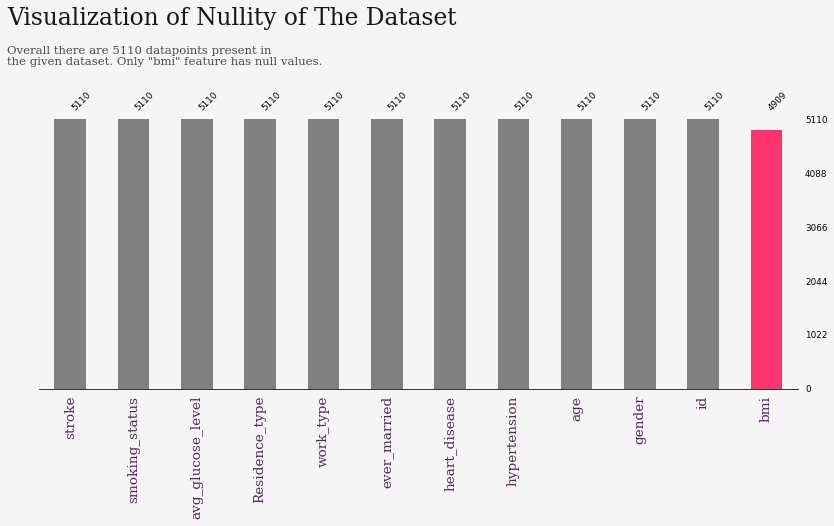

In [5]:
# Creating a figure and axis object with specified size and resolution
fig, ax = plt.subplots(figsize=(14, 5), dpi=70)
fig.patch.set_facecolor('#f6f5f5')  # Setting background color for the figure
ax.set_facecolor('#f6f5f5')  # Setting background color for the axis

# Creating a missing value bar chart for the dataframe `df`
# Sorting the bars in descending order, setting custom colors, and other styling options
msno.bar(df, sort='descending', color=['grey']*11 + ['#fe346e'], ax=ax, fontsize=9, labels='off', filter='top')

# Adding a title text above the plot
ax.text(-1, 1.35, 'Visualization of Nullity of The Dataset', 
        {'font': 'Serif', 'size': 24, 'color': 'black'}, alpha=0.9)

# Adding a subtitle text with description below the title
ax.text(-1, 1.2, 'Overall there are 5110 datapoints present in \nthe given dataset. Only "bmi" feature has null values.', 
        {'font': 'Serif', 'size': 12, 'color': 'black'}, alpha=0.7)

# Customizing x-tick labels with specific font properties and rotating them for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', 
                   **{'font': 'Serif', 'size': 14, 'weight': 'normal', 'color': '#512b58'}, alpha=1)

# Removing y-tick labels
ax.set_yticklabels('')

# Making the bottom spine visible
ax.spines['bottom'].set_visible(True)

# Displaying the plot
plt.show()

<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">1.5 Data Information</div>

In [6]:
display_df_details(df)

##
<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">1.6 Data Cleaning / Handle Missing Values</div>

In [7]:
# Notice that there are only Other unique values in the gender column
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [8]:
# Fill missing values in 'bmi' column with mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Replace gender value Female, Male, Other to Female, Male using mode
df.loc[df['gender'] == 'Other', 'gender'] = df['gender'].mode()[0]

# Drop 'id' column
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

# For EDA DataFrame

# Visualize purpose
if not 'bmi_cat' in df.columns:
    df_eda = df.copy()
    df_eda['bmi_cat'] = pd.cut(df_eda['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
    df_eda['age_cat'] = pd.cut(df_eda['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
    df_eda['glucose_cat'] = pd.cut(df_eda['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
    df_eda.head()

# Encode object dtypes columns
df = encode_objectdtypes_columns(df, df.select_dtypes('object').columns)

# Filter out 'id' in num_col
num_col = [col for col in num_col if col != 'id']

display_df_details(df)

#
<style>
.border{
  color: white;
  font-weight: 550;
  font-size: 25px;
  font-family: Arial, Helvetica, sans-serif;
  padding: 15px;
  justify-content: center;
  box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
  display: flex;
  max-width: 95%;
  margin:0 auto;
  height: 40px;
  border-radius: 50px;
  transition: top ease 0.5s;
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  top: 5px;
}
.border-important {
  /* background: #fe346e; */
  background-color: #fe346e;
}
.border:hover{
  box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
  top: 0px
}
</style>
<div class="border border-important">2. EDA & Data Visualization</div>


<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">Summary Statistics</div>

In [9]:
df.select_dtypes('float').describe()

age  avg_glucose_level          bmi
count  5110.000000        5110.000000  5110.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.698018
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.800000
50%      45.000000          91.885000    28.400000
75%      61.000000         114.090000    32.800000
max      82.000000         271.740000    97.600000

##
<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">2.1 Overview of univariate categorical variables</div>

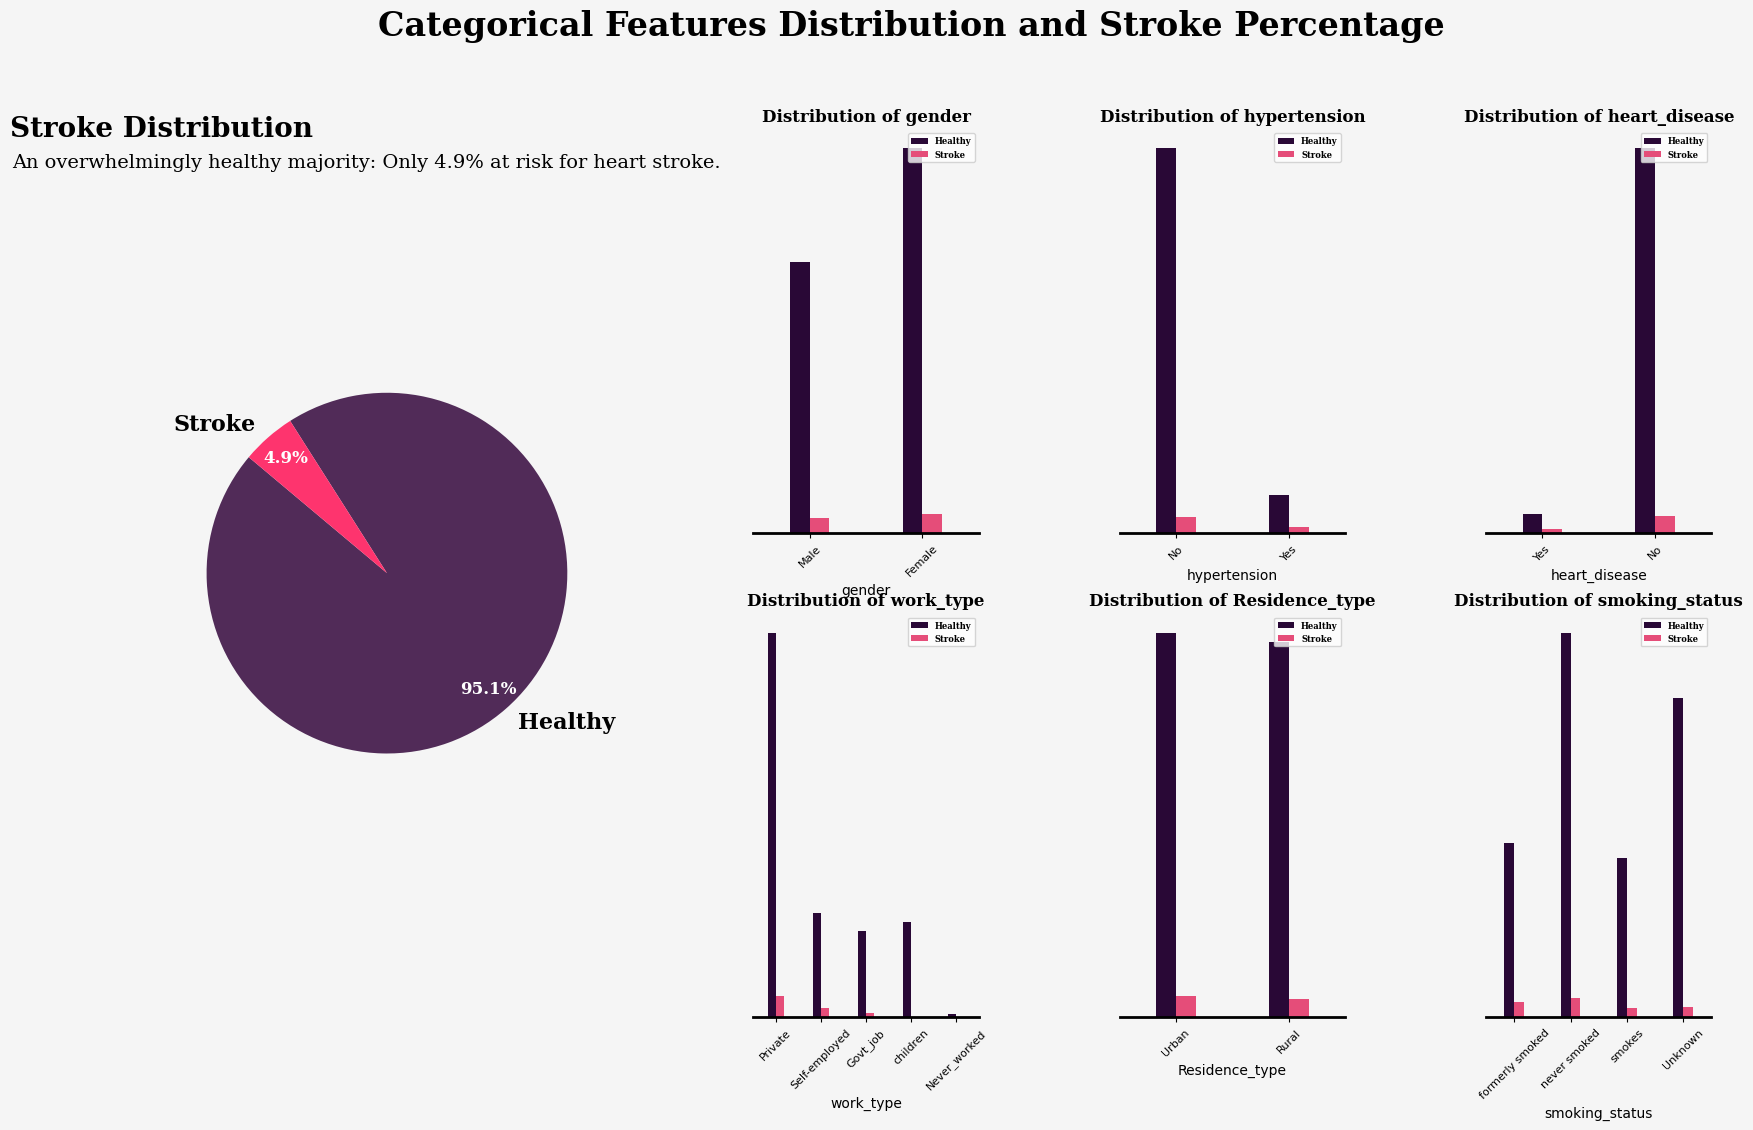

In [10]:
# Plot categorical data
categorical_data_visualization(df_eda, cat_col, "Stroke Distribution", "An overwhelmingly healthy majority: Only 4.9% at risk for heart stroke.")

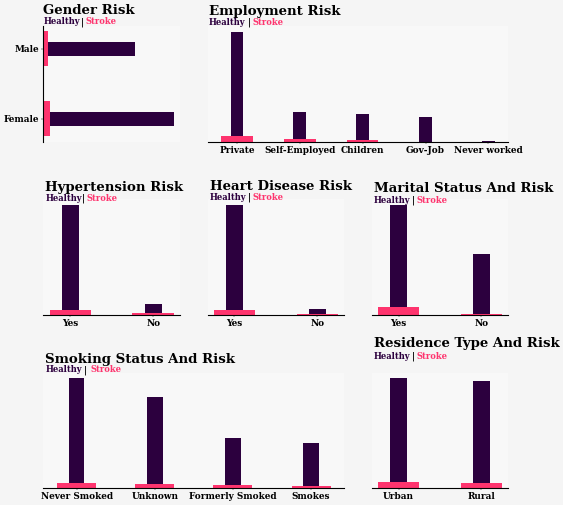

In [11]:
# Setting up the figure with custom dimensions and DPI
fig = plt.figure(figsize=(15, 15), dpi=40)

# Creating a 3x3 grid for subplots
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.5)

# Defining subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0:2])
ax7 = fig.add_subplot(gs[2, 2])

# List of all axes for easier customization
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

# Set background color of the figure
fig.patch.set_facecolor('#f5f5f5')

# Customizing the appearance of each subplot
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)  # Hiding y-axis
    ax.set_facecolor('#f8f8f8')             # Setting background color for each axis
    ax.spines['bottom'].set_linewidth(2)    # Bottom spine thicker
    for loc in ['left', 'right', 'top']:    # Hide other spines
        ax.spines[loc].set_visible(False)
        ax.spines[loc].set_linewidth(2)

# Text formatting dictionaries for title, labels, etc.
title_args = {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 24}
font_dict = {'size': 16, 'family': 'Serif', 'color': 'black', 'weight': 'bold'}
health_dict = {'font': 'Serif', 'color': '#2c003e', 'size': 15, 'weight': 'bold'}
dash_dict = {'font': 'Serif', 'color': 'black', 'size': 15, 'weight': 'bold'}
stroke_dict = {'font': 'Serif', 'color': '#fe346e', 'size': 15, 'weight': 'bold'}

# Custom colors
stroke_col = '#fe346e'
healthy_col = '#2c003e'

# Ax1: Gender- stroke distributions
healthy_gen = df_eda[df_eda['stroke'] == 0].gender.value_counts()
stroke_gen = df_eda[df_eda['stroke'] == 1].gender.value_counts()

ax1.barh(stroke_gen.index, width=healthy_gen.values[0:2], height=0.2, color=healthy_col)
ax1.barh(np.arange(len(stroke_gen.index)), width=stroke_gen.values, height=0.5, color=stroke_col)
ax1.set_yticks(np.arange(len(stroke_gen.index)))  # Set y-ticks before setting labels
ax1.set_yticklabels(stroke_gen.index, **font_dict)

ax1.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.text(0, 1.5, 'Gender Risk', **title_args)
ax1.text(0, 1.35, 'Healthy', **health_dict)
ax1.text(820, 1.35, '|', **dash_dict)
ax1.text(930, 1.35, 'Stroke', **stroke_dict)

# Ax2: work type - stroke distributions
healthy_gen = df_eda[df_eda['stroke'] == 0].work_type.value_counts()
stroke_gen = df_eda[df_eda['stroke'] == 1].work_type.value_counts()

ax2.bar(healthy_gen.index, height=healthy_gen.values, width=0.2, color=healthy_col)
ax2.bar(np.arange(len(stroke_gen.index)), height=stroke_gen.values, width=0.5, color=stroke_col)
ax2.set_xticks(np.arange(len(healthy_gen.index)))  # Set x-ticks before setting labels
ax2.set_xticklabels(['Private', 'Self-Employed', 'Children', 'Gov-Job', 'Never worked'], **font_dict)

ax2.text(-0.45, 3200, 'Employment Risk', **title_args)
ax2.text(-0.45, 2950, 'Healthy', **health_dict)
ax2.text(0.18, 2950, '|', **dash_dict)
ax2.text(0.25, 2950, 'Stroke', **stroke_dict)

# Ax3: hypertension - stroke distributions
healthy_gen = df_eda[df_eda['stroke'] == 0].hypertension.value_counts()
stroke_gen = df_eda[df_eda['stroke'] == 1].hypertension.value_counts()

ax3.bar(['Yes', 'No'], height=healthy_gen.values, width=0.2, color=healthy_col)
ax3.bar(stroke_gen.index, height=stroke_gen.values, width=0.5, color=stroke_col)
ax3.set_xticks(np.arange(len(healthy_gen.index)))  # Set x-ticks before setting labels
ax3.set_xticklabels(['Yes', 'No'], **font_dict)

ax3.text(-0.3, 5000, 'Hypertension Risk', **title_args)
ax3.text(-0.3, 4600, 'Healthy', **health_dict)
ax3.text(0.14, 4600, '|', **dash_dict)
ax3.text(0.2, 4600, 'Stroke', **stroke_dict)

# Ax4: Heart Disease - stroke distributions
healthy_gen = df_eda[df_eda['stroke'] == 0].heart_disease.value_counts()
stroke_gen = df_eda[df_eda['stroke'] == 1].heart_disease.value_counts()

ax4.bar(['Yes', 'No'], height=healthy_gen.values, width=0.2, color=healthy_col)
ax4.bar(stroke_gen.index, height=stroke_gen.values, width=0.5, color=stroke_col)
ax4.set_xticks(np.arange(len(healthy_gen.index)))  # Set x-ticks before setting labels
ax4.set_xticklabels(['Yes', 'No'], **font_dict)

ax4.text(-0.3, 5250, 'Heart Disease Risk', **title_args)
ax4.text(-0.3, 4850, 'Healthy', **health_dict)
ax4.text(0.16, 4850, '|', **dash_dict)
ax4.text(0.22, 4850, 'Stroke', **stroke_dict)

# Ax5: Married - stroke distributions
healthy_gen = df_eda[df_eda['stroke'] == 0].ever_married.value_counts()
stroke_gen = df_eda[df_eda['stroke'] == 1].ever_married.value_counts()

ax5.bar(healthy_gen.index, height=healthy_gen.values, width=0.2, color=healthy_col)
ax5.bar(np.arange(len(stroke_gen.index)), height=stroke_gen.values, width=0.5, color=stroke_col)
ax5.set_xticks(np.arange(len(healthy_gen.index)))  # Set x-ticks before setting labels
ax5.set_xticklabels(healthy_gen.index, **font_dict)

ax5.text(-0.3, 3500, 'Marital Status And Risk', **title_args)
ax5.text(-0.3, 3200, 'Healthy', **health_dict)
ax5.text(0.16, 3200, '|', **dash_dict)
ax5.text(0.22, 3200, 'Stroke', **stroke_dict)

# Ax6: Smoking status - stroke distributions
healthy_gen = df_eda[df_eda['stroke'] == 0].smoking_status.value_counts()
stroke_gen = df_eda[df_eda['stroke'] == 1].smoking_status.value_counts()

ax6.bar(healthy_gen.index, height=healthy_gen.values, width=0.2, color=healthy_col)
ax6.bar(np.arange(len(stroke_gen.index)), height=stroke_gen.values, width=0.5, color=stroke_col)
ax6.set_xticks(np.arange(len(healthy_gen.index)))  # Set x-ticks before setting labels
ax6.set_xticklabels(['Never Smoked', 'Unknown', 'Formerly Smoked', 'Smokes'], **font_dict)

ax6.text(-0.4, 2050, 'Smoking Status And Risk', **title_args)
ax6.text(-0.4, 1900, 'Healthy', **health_dict)
ax6.text(0.095, 1900, '|', **dash_dict)
ax6.text(0.18, 1900, 'Stroke', **stroke_dict)

# Ax7: Residence type - stroke distributions
healthy_gen = df_eda[df_eda['stroke'] == 0].Residence_type.value_counts()
stroke_gen = df_eda[df_eda['stroke'] == 1].Residence_type.value_counts()

ax7.bar(healthy_gen.index, height=healthy_gen.values, width=0.2, color=healthy_col)
ax7.bar(np.arange(len(stroke_gen.index)), height=stroke_gen.values, width=0.5, color=stroke_col)
ax7.set_xticks(np.arange(len(healthy_gen.index)))  # Set x-ticks before setting labels
ax7.set_xticklabels(healthy_gen.index, **font_dict)

ax7.text(-0.3, 3150, 'Residence Type And Risk', **title_args)
ax7.text(-0.3, 2900, 'Healthy', **health_dict)
ax7.text(0.16, 2900, '|', **dash_dict)
ax7.text(0.22, 2900, 'Stroke', **stroke_dict)

plt.show()

##
<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">2.2 Univariate analysis of continuous variables</div>

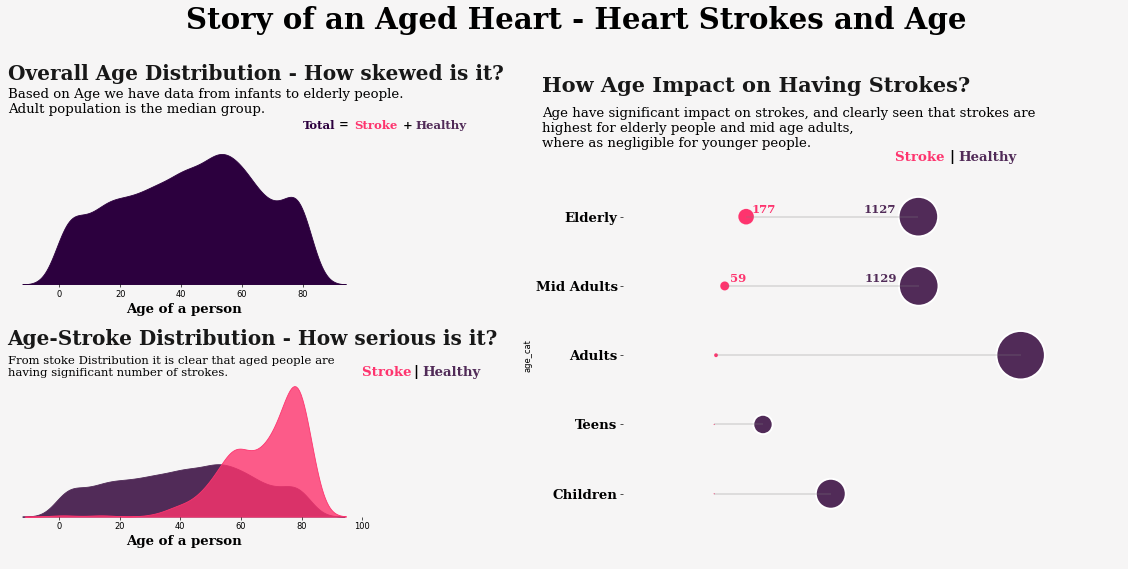

In [12]:
# Setting up figure
fig = plt.figure(figsize = (24,10), dpi = 60)

# Setting up gridspec
gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

# Defining subplots
ax2 = fig.add_subplot(gs[1:4,0:8]) # Distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) # Hue distribution plot
ax1 = fig.add_subplot(gs[1:10,13:]) # Dumbbell plot

# Axes list
axes = [ ax1,ax2, ax3]

# Setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# Dumbbell plot of stoke and healthy people
stroke_age = df_eda[df_eda['stroke'] == 1].age_cat.value_counts()
healthy_age = df_eda[df_eda['stroke'] == 0].age_cat.value_counts()

# Set ticks first
ax1.hlines(y=[0, 1, 2, 3, 4], xmin=[644, 270, 1691, 1129, 1127], 
          xmax=[1, 1, 11, 59, 177], color='grey', **{'linewidth': 0.5})

# Set labels
ax1.set_yticks([0, 1, 2, 3, 4])
ax1.set_yticklabels(labels=['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Scatter plot
sns.scatterplot(y = stroke_age.index, x = stroke_age.values, s = stroke_age.values*2, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_age.index, x = healthy_age.values, s = healthy_age.values*2, color = '#512b58', ax= ax1, alpha = 1)

# Set limits
ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 2250)
ax1.set_ylim(ymin = -1,ymax = 5)

# Set y-labels
ax1.set_yticklabels( labels = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

# Set title
ax1.text(-950,5.8, 'How Age Impact on Having Strokes?' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,4.8, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(1300,4.8, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1350,4.8, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-950,5., 'Age have significant impact on strokes, and clearly seen that strokes are \nhighest for elderly people and mid age adults, \nwhere as negligible for younger people.', 
        {'font':'Serif', 'size':'16','color': 'black'})

# Set text
ax1.text(stroke_age.values[0] + 30,4.05, stroke_age.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[2] - 300,4.05, healthy_age.values[2], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_age.values[1] + 30,3.05, stroke_age.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[1] - 300,3.05, healthy_age.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

# Distribution plots ---- only single variable
sns.kdeplot(data=df, x='age', ax=ax2, fill=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.025,'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax2.text(-17,0.021, 'Based on Age we have data from infants to elderly people.\nAdult population is the median group.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(80,0.019, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(92,0.019, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.019, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(113,0.019, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.019, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})

# Distribution plots with hue of strokes
sns.kdeplot(data=df[df['stroke'] == 0], x='age', ax=ax3, fill=True, alpha=1, color='#512b58')
sns.kdeplot(data=df[df['stroke'] == 1], x='age', ax=ax3, fill=True, alpha=0.8, color='#fe346e')

# Set Xlabels
ax3.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

# Set Subtitle
ax3.text(-17,0.0525,'Age-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(-17,0.043,'From stoke Distribution it is clear that aged people are \nhaving significant number of strokes.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(117,0.043, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

# Set title
fig.text(0.25,1,'Story of an Aged Heart - Heart Strokes and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

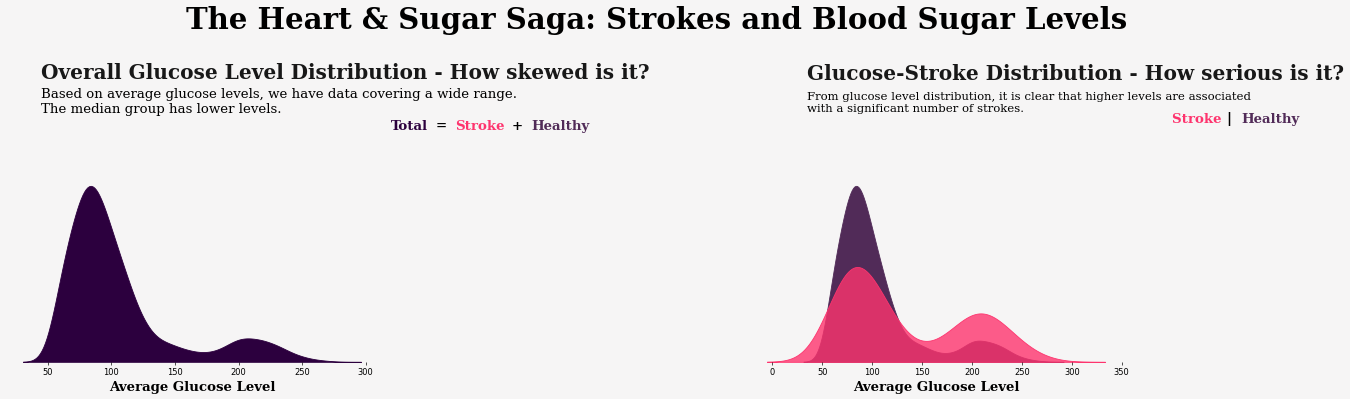

In [13]:
# Create the figure with specific size and DPI (dots per inch)
fig = plt.figure(figsize=(24, 4), dpi=60)

# Create a GridSpec layout with 1 row and 2 columns and adjust spacing between plots
gs = fig.add_gridspec(1, 2)
gs.update(wspace=1, hspace=0.05)  # Increase horizontal space between plots, minimal vertical space

# Define the subplots (two axes) using the GridSpec layout
ax1 = fig.add_subplot(gs[0, 0])  # Left subplot for the distribution plot
ax2 = fig.add_subplot(gs[0, 1])  # Right subplot for the distribution plot with hue

# Store axes in a list for easier customization
axes = [ax1, ax2]

# Customize both axes: remove y-axis visibility and set background colors
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)  # Hide y-axis for a cleaner look
    ax.set_facecolor('#f6f5f5')  # Set a light background color for the plot
    
    # Hide all spines (borders around the plot)
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

# Set background color for the entire figure
fig.patch.set_facecolor('#f6f5f5')

# ---- Distribution Plot 1: Overall distribution of 'avg_glucose_level' ----
# Create a KDE (Kernel Density Estimation) plot for 'avg_glucose_level' with filled area and color
sns.kdeplot(data=df, x='avg_glucose_level', ax=ax1, fill=True, color='#2c003e', alpha=1)

# Add an x-axis label with customized font properties
ax1.set_xlabel('Average Glucose Level', fontdict={'font': 'Serif', 'color': 'black', 'size': 16, 'weight': 'bold'})

# Adding textual descriptions and titles to the first subplot
ax1.text(45, 0.0256, 'Overall Glucose Level Distribution - How skewed is it?', 
         {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 24}, alpha=0.9)

# Provide more explanation about the distribution
ax1.text(45, 0.0225, 'Based on average glucose levels, we have data covering a wide range. \nThe median group has lower levels.', 
         {'font': 'Serif', 'size': '16', 'color': 'black'})

# Annotate the plot with additional text for total distribution and its parts (stroke and healthy)
ax1.text(320, 0.021, 'Total', {'font': 'Serif', 'size': '16', 'color': '#2c003e', 'weight': 'bold'})
ax1.text(355, 0.021, '=', {'font': 'Serif', 'size': '16', 'color': 'black', 'weight': 'bold'})
ax1.text(370, 0.021, 'Stroke', {'font': 'Serif', 'size': '16', 'color': '#fe346e', 'weight': 'bold'})
ax1.text(415, 0.021, '+', {'font': 'Serif', 'size': '16', 'color': 'black', 'weight': 'bold'})
ax1.text(430, 0.021, 'Healthy', {'font': 'Serif', 'size': '16', 'color': '#512b58', 'weight': 'bold'})

# ---- Distribution Plot 2: Distribution of 'avg_glucose_level' with stroke hue ----
# Create a KDE plot for 'avg_glucose_level' where 'stroke' is 0 (healthy) and 1 (stroke), with different colors
sns.kdeplot(data=df[df['stroke'] == 0], x='avg_glucose_level', ax=ax2, fill=True, alpha=1, color='#512b58')  # Healthy group
sns.kdeplot(data=df[df['stroke'] == 1], x='avg_glucose_level', ax=ax2, fill=True, alpha=0.8, color='#fe346e')  # Stroke group

# Add an x-axis label for the second subplot with similar formatting
ax2.set_xlabel('Average Glucose Level', fontdict={'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 16})

# Title and description for the second plot (stroke vs healthy distribution)
ax2.text(35, 0.026, 'Glucose-Stroke Distribution - How serious is it?', 
         {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 24}, alpha=0.9)

# Provide further explanation about the glucose levels and stroke correlation
ax2.text(35, 0.0231, 'From glucose level distribution, it is clear that higher levels are associated \nwith a significant number of strokes.', 
         {'font': 'Serif', 'color': 'black', 'size': 14})

# Annotate the plot to distinguish stroke and healthy categories
ax2.text(400, 0.022, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#fe346e'})
ax2.text(455, 0.022, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax2.text(470, 0.022, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#512b58'})

# ---- Main Title for the Entire Figure ----
# Add a large main title to the figure, centered at the top, with custom font settings
fig.text(0.25, 1.5, 'The Heart & Sugar Saga: Strokes and Blood Sugar Levels', 
         {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 35})

# Display the plot
plt.show()

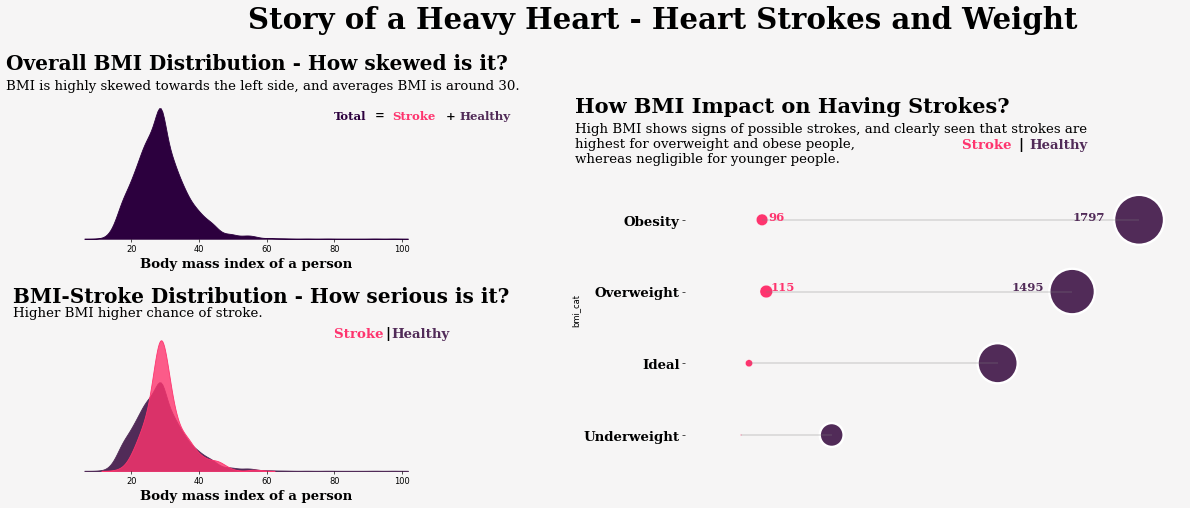

In [14]:
# Create a figure with specified size and resolution
fig = plt.figure(figsize=(24, 10), dpi=60)

# Create a grid of 10 rows and 24 columns with space adjustments
gs = fig.add_gridspec(10, 24)
gs.update(wspace=1, hspace=0.05)

# Assign different parts of the grid for each subplot
ax2 = fig.add_subplot(gs[1:4, 0:8])  # Distribution plot for BMI
ax3 = fig.add_subplot(gs[6:9, 0:8])  # Hue distribution plot for BMI vs stroke
ax1 = fig.add_subplot(gs[2:9, 13:])  # Dumbbell plot for stroke vs healthy people by BMI category

# Store all axes in a list to iterate over and apply common settings
axes = [ax1, ax2, ax3]

# Set axis visibility and remove spines for a clean look
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)  # Hide y-axis
    ax.set_facecolor('#f6f5f5')  # Set background color
    
    # Remove all spines (border lines) for each axis
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

# Set background color of the figure
fig.patch.set_facecolor('#f6f5f5')

# Hide x-axis for the dumbbell plot, but keep y-axis visible
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_xlim(xmin=-250, xmax=2000)  # Set x-axis limits
ax1.set_ylim(ymin=-1, ymax=3.5)     # Set y-axis limits

# Dumbbell plot showing BMI categories for stroke and healthy individuals
stroke_bmi = df_eda[df_eda['stroke'] == 1].bmi_cat.value_counts()  # Stroke data
healthy_bmi = df_eda[df_eda['stroke'] == 0].bmi_cat.value_counts()  # Healthy data

# Draw grey horizontal lines representing categories
ax1.hlines(y=['Obesity', 'Overweight', 'Ideal', 'Underweight'], xmin=[96, 115, 37, 1],
           xmax=[1797, 1495, 1159, 410], color='grey', linewidth=0.5)

# Plot scatter points for stroke and healthy people based on BMI categories
sns.scatterplot(y=stroke_bmi.index, x=stroke_bmi.values, s=stroke_bmi.values * 2, color='#fe346e', ax=ax1, alpha=1)  # Stroke
sns.scatterplot(y=healthy_bmi.index, x=healthy_bmi.values, s=healthy_bmi.values * 2, color='#512b58', ax=ax1, alpha=1)  # Healthy

# Set y-ticks and labels for BMI categories
ax1.set_yticks(range(4))  
ax1.set_yticklabels(labels=['Obesity', 'Overweight', 'Ideal', 'Underweight'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Add title and annotations explaining the BMI impact on strokes
ax1.text(-750, -1.5, 'How BMI Impact on Having Strokes?', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
ax1.text(1000, -1., 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#fe346e'})
ax1.text(1250, -1, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax1.text(1300, -1, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#512b58'})
ax1.text(-750, -0.8, 'High BMI shows signs of possible strokes, and clearly seen that strokes are \nhighest for overweight and obese people, \nwhereas negligible for younger people.',
         {'font': 'Serif', 'size': '16', 'color': 'black'})

# Add numeric labels near the scatter points for stroke and healthy groups
ax1.text(stroke_bmi.values[0] + 20, 0.98, stroke_bmi.values[0], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#fe346e'})
ax1.text(healthy_bmi.values[1] - 275, 0.98, healthy_bmi.values[1], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#512b58'})
ax1.text(stroke_bmi.values[1] + 30, 0, stroke_bmi.values[1], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#fe346e'})
ax1.text(healthy_bmi.values[0] - 300, 0, healthy_bmi.values[0], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#512b58'})

# Plot the overall BMI distribution (all individuals)
sns.kdeplot(data=df_eda, x='bmi', ax=ax2, fill=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Body mass index of a person', fontdict={'font': 'Serif', 'color': 'black', 'size': 16, 'weight': 'bold'})
ax2.text(-17, 0.085, 'Overall BMI Distribution - How skewed is it?', {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 24})
ax2.text(-17, 0.075, 'BMI is highly skewed towards the left side, and averages BMI is around 30.',
         {'font': 'Serif', 'size': '16', 'color': 'black'})
ax2.text(80, 0.06, 'Total', {'font': 'Serif', 'size': '14', 'color': '#2c003e', 'weight': 'bold'})
ax2.text(92, 0.06, '=', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(97, 0.06, 'Stroke', {'font': 'Serif', 'size': '14', 'color': '#fe346e', 'weight': 'bold'})
ax2.text(113, 0.06, '+', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(117, 0.06, 'Healthy', {'font': 'Serif', 'size': '14', 'color': '#512b58', 'weight': 'bold'})

# Plot BMI distribution with hue (stroke vs healthy)
sns.kdeplot(data=df_eda[df_eda['stroke'] == 0], x='bmi', ax=ax3, fill=True, alpha=1, color='#512b58')  # Healthy
sns.kdeplot(data=df_eda[df_eda['stroke'] == 1], x='bmi', ax=ax3, fill=True, alpha=0.8, color='#fe346e')  # Stroke

ax3.set_xlabel('Body mass index of a person', fontdict={'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 16})

# Add title and annotations for the hue distribution plot
ax3.text(-15, 0.12, 'BMI-Stroke Distribution - How serious is it?', {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 24})
ax3.text(-15, 0.11, 'Higher BMI higher chance of stroke.', {'font': 'Serif', 'color': 'black', 'size': 16})
ax3.text(80, 0.095, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#fe346e'})
ax3.text(95, 0.095, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax3.text(97, 0.095, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#512b58'})

# Add an overarching title for the entire figure
fig.text(0.25, 0.925, 'Story of a Heavy Heart - Heart Strokes and Weight', {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 35})

# Display the final visualization
plt.show()

##
<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">2.3 Univariate analysis of categorical variables</div>

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Gender Distribution</div>

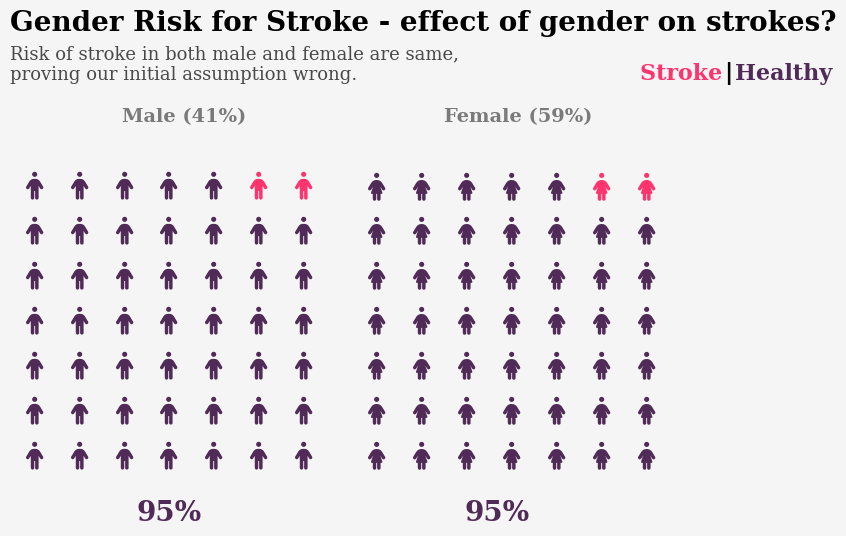

In [15]:
# Generate stroke and healthy gender counts based on 'stroke' column.
stroke_gender_count = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gender_count = df[df['stroke'] == 0]['gender'].value_counts()

# Calculate total counts for female and male.
female_count = df['gender'].value_counts().values[0]
male_count = df['gender'].value_counts().values[1]

# Calculate stroke and healthy percentages for both genders.
stroke_female_percentage = int(round(stroke_gender_count.values[0] / female_count * 100, 0))
stroke_male_percentage = int(round(stroke_gender_count.values[1] / male_count * 100, 0))
healthy_female_percentage = int(round(healthy_gender_count.values[0] / female_count * 100, 0))
healthy_male_percentage = int(round(healthy_gender_count.values[1] / male_count * 100, 0))

# Calculate total percentage distribution for male and female.
total_female_percentage = int(round(female_count / (female_count + male_count) * 100, 0))
total_male_percentage = int(round(male_count / (female_count + male_count) * 100, 0))

# Create a Waffle plot representing male and female stroke and healthy counts.
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(7, 7),
                 facecolor='#f6f5f5',
                 dpi=100,
                 interval_ratio_y=0.1,
                 interval_ratio_x=0.1,
                 plot_anchor='C',
                 vertical=True,
                 icon_legend=False,
                 icon_size=20,
                 alpha=0.1,
                 plots={
                     121: {
                         'rows': 7,
                         'columns': 7,
                         'values': [healthy_male_percentage, stroke_male_percentage],
                         'colors': ['#512b58', '#fe346e'],
                         'icons': 'male',
                     },
                     122: {
                         'rows': 7,
                         'columns': 7,
                         'values': [healthy_female_percentage, stroke_female_percentage],
                         'colors': ['#512b58', '#fe346e'],
                         'icons': 'female',
                     }
                 },
)

# Adjust space between subplots.
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add title, subtitles, and labels to the plot.
fig.text(0., 0.9, 'Gender Risk for Stroke - effect of gender on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.83, 'Risk of stroke in both male and female are same,\nproving our initial assumption wrong.', 
         {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha=0.7)
fig.text(0.24, 0.32, 'ooo', {'font':'Serif', 'size':16, 'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.32, 'ooo', {'font':'Serif', 'size':16, 'weight':'bold', 'color':'#f6f5f5'})
fig.text(0.18, 0.20, '{}%'.format(healthy_male_percentage), {'font':'Serif', 'size':20, 'weight':'bold', 'color':'#512b58'}, alpha=1)
fig.text(0.65, 0.20, '{}%'.format(healthy_female_percentage), {'font':'Serif', 'size':20, 'weight':'bold', 'color':'#512b58'}, alpha=1)
fig.text(0.16, 0.77, 'Male ({}%)'.format(total_male_percentage), {'font':'Serif', 'size':14, 'weight':'bold', 'color':'black'}, alpha=0.5)
fig.text(0.62, 0.77, 'Female ({}%)'.format(total_female_percentage), {'font':'Serif', 'size':14, 'weight':'bold', 'color':'black'}, alpha=0.5)

# Add labels to indicate stroke and healthy categories.
fig.text(0.9, 0.83, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02, 0.83, '|', {'color':'black', 'size':'16', 'weight': 'bold'})
fig.text(1.035, 0.83, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'}, alpha=1)

# Display the plot.
plt.show()

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Marriage Distribution</div>

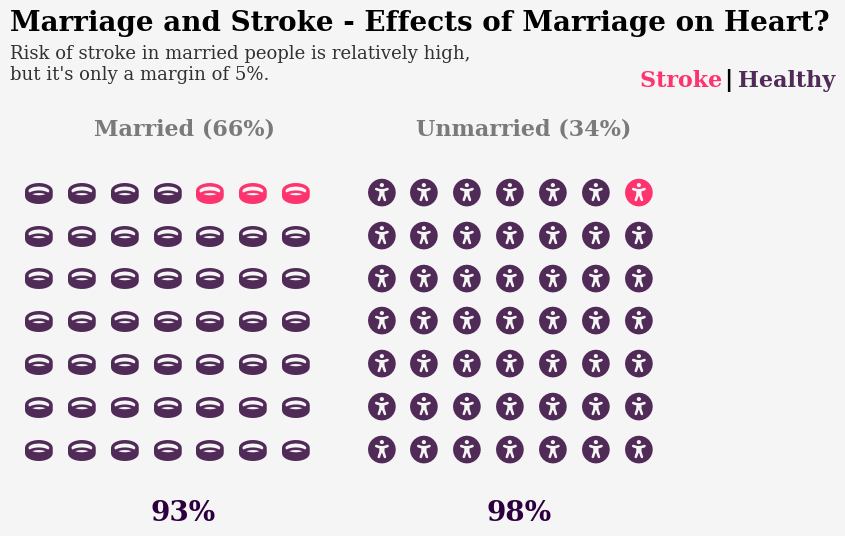

In [16]:
# Get counts of married and unmarried individuals based on stroke status.
stroke_married_status = df[df['stroke'] == 1]['ever_married'].value_counts()
healthy_married_status = df[df['stroke'] == 0]['ever_married'].value_counts()

# Calculate total counts for married and unmarried individuals.
married_count = df['ever_married'].value_counts().values[0]
unmarried_count = df['ever_married'].value_counts().values[1]

# Calculate percentage of married/unmarried individuals who had a stroke.
stroke_unmarried_percentage = int(round(stroke_married_status.values[1] / unmarried_count * 100, 0))
stroke_married_percentage = int(round(stroke_married_status.values[0] / married_count * 100, 0))

# Calculate percentage of married/unmarried individuals who did not have a stroke.
healthy_unmarried_percentage = int(round(healthy_married_status.values[1] / unmarried_count * 100, 0))
healthy_married_percentage = int(round(healthy_married_status.values[0] / married_count * 100, 0))

# Calculate overall percentage of married/unmarried individuals.
unmarried_overall_percentage = int(round(unmarried_count / (unmarried_count + married_count) * 100, 0))
married_overall_percentage = int(round(married_count / (unmarried_count + married_count) * 100, 0))

# Create the Waffle plot to visualize married and unmarried individuals based on stroke and healthy status.
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(7, 7),
                 facecolor='#f6f5f5',
                 vertical=True,
                 dpi=100,
                 interval_ratio_y=0.005,
                 interval_ratio_x=0.005,
                 plot_anchor='C',
                 icon_size=20,
                 icon_legend=False,
                 alpha=0.8,
                 starting_location='NE',
                 plots={
                     121: {  # First subplot for married individuals.
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_married_percentage, healthy_married_percentage],
                         'colors': ['#fe346e', '#512b58'],  # Colors for stroke and healthy.
                         'icons': 'ring',  # Icon to represent married individuals.
                     },
                     122: {  # Second subplot for unmarried individuals.
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_unmarried_percentage, healthy_unmarried_percentage],
                         'colors': ['#fe346e', '#512b58'],  # Colors for stroke and healthy.
                         'icons': 'universal-access',  # Icon to represent unmarried individuals.
                     }
                 }
)

# Adjust space between subplots.
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add titles and explanatory text to the Waffle plot.
fig.text(0., 0.9, 'Marriage and Stroke - Effects of Marriage on Heart?', 
         {'font': 'Serif', 'size': 20, 'color': 'black', 'weight': 'bold'})
fig.text(0., 0.83, 'Risk of stroke in married people is relatively high,\n'
         'but it\'s only a margin of 5%.', 
         {'font': 'Serif', 'size': 13, 'color': 'black', 'weight': 'normal'}, alpha=0.8)

# Additional annotations for percentage representation of healthy individuals.
fig.text(0.20, 0.20, '{}%'.format(healthy_married_percentage), 
         {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.68, 0.20, '{}%'.format(healthy_unmarried_percentage), 
         {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)

# Annotate with overall percentage of married/unmarried individuals.
fig.text(0.12, 0.75, 'Married ({}%)'.format(married_overall_percentage), 
         {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.58, 0.75, 'Unmarried ({}%)'.format(unmarried_overall_percentage), 
         {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)

# Add legend-like labels for stroke and healthy categories.
fig.text(0.9, 0.82, 'Stroke ', 
         {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#fe346e'})
fig.text(1.02, 0.82, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
fig.text(1.04, 0.82, 'Healthy', 
         {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#512b58'}, alpha=1)

# Display the plot.
plt.show()

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Residence Distribution</div>

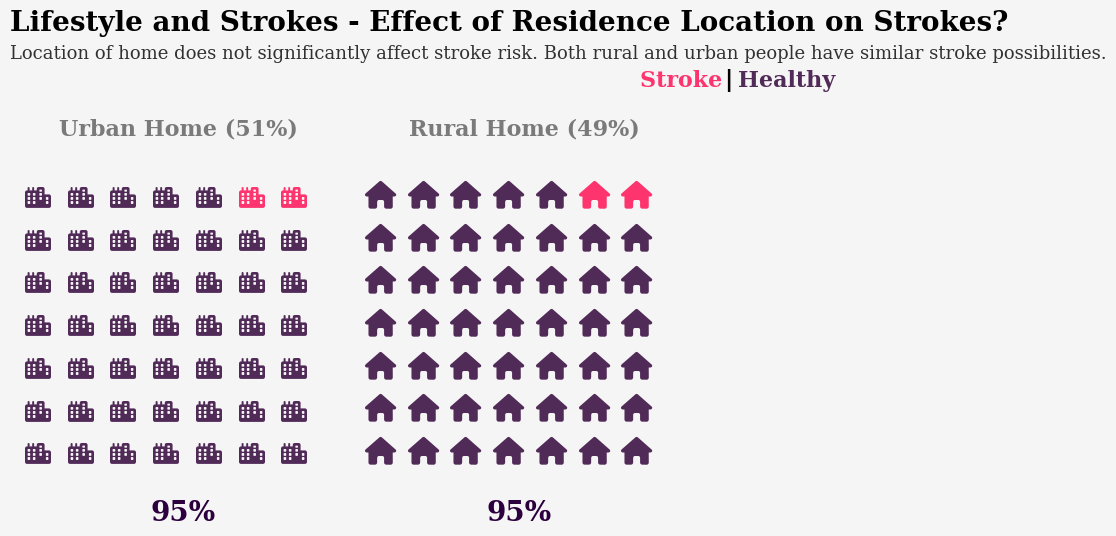

In [17]:
# Get stroke and healthy counts based on residence type
stroke_residence = df[df['stroke'] == 1]['Residence_type'].value_counts()
healthy_residence = df[df['stroke'] == 0]['Residence_type'].value_counts()

# Get total counts for urban and rural residences
urban_count = df['Residence_type'].value_counts().values[0]
rural_count = df['Residence_type'].value_counts().values[1]

# Calculate stroke and healthy percentages for both urban and rural areas
stroke_urban_pct = int(round(stroke_residence.values[0] / urban_count * 100, 0))
stroke_rural_pct = int(round(stroke_residence.values[1] / rural_count * 100, 0))
healthy_urban_pct = int(round(healthy_residence.values[0] / urban_count * 100, 0))
healthy_rural_pct = int(round(healthy_residence.values[1] / rural_count * 100, 0))

# Calculate percentages of urban and rural residences in the dataset
urban_pct = int(round(urban_count / (urban_count + rural_count) * 100, 0))
rural_pct = int(round(rural_count / (urban_count + rural_count) * 100, 0))

# Define common parameters for both subplots
common_params = {
    'rows': 7,
    'columns': 7,
    'colors': ['#fe346e', '#512b58'],
    'vertical': True,
    'interval_ratio_x': 0.005,
    'interval_ratio_y': 0.005,
    'plot_anchor': 'C',
    'alpha': 0.8,
    'starting_location': 'NE'
}

# Create the Waffle plot
fig = plt.figure(FigureClass=Waffle,
                 constrained_layout=True,  # Adjust layout
                 figsize=(7, 7),  # Set figure size
                 facecolor='#f6f5f5',  # Set background color
                 dpi=100,  # Set resolution
                 plots={
                     121: {  # Urban subplot
                         **common_params,  # Use common parameters
                         'values': [stroke_urban_pct, healthy_urban_pct],  # Data for urban
                         'icons': 'city',  # Use city icon for urban
                         'icon_size': 15,  # Icon size
                         'icon_legend': False  # Disable legend
                     },
                     122: {  # Rural subplot
                         **common_params,  # Use common parameters
                         'values': [stroke_rural_pct, healthy_rural_pct],  # Data for rural
                         'icons': 'home',  # Use home icon for rural
                         'icon_size': 20,  # Icon size for rural
                         'icon_legend': False  # Disable legend
                     }
                 }
)
# Adjust space between subplots
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add main title and description
fig.text(0., 0.9, 'Lifestyle and Strokes - Effect of Residence Location on Strokes?', 
         {'font': 'Serif', 'size': 20, 'color': 'black', 'weight': 'bold'})
fig.text(0., 0.86, 'Location of home does not significantly affect stroke risk. Both rural and urban people have similar stroke possibilities.',
         {'font': 'Serif', 'size': 13, 'color': 'black', 'weight': 'normal'}, alpha=0.8)

# Add text annotations for percentages and residence types
fig.text(0.2, 0.2, '{}%'.format(healthy_urban_pct), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.68, 0.2, '{}%'.format(healthy_rural_pct), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.07, 0.75, 'Urban Home ({}%)'.format(urban_pct), {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.57, 0.75, 'Rural Home ({}%)'.format(rural_pct), {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)

# Add legend for stroke vs. no stroke
fig.text(0.9, 0.82, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#fe346e'})
fig.text(1.02, 0.82, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
fig.text(1.04, 0.82, 'Healthy', 
         {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#512b58'}, alpha=1)

# Show the plot
plt.show()


###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Hypertension Distribution</div>

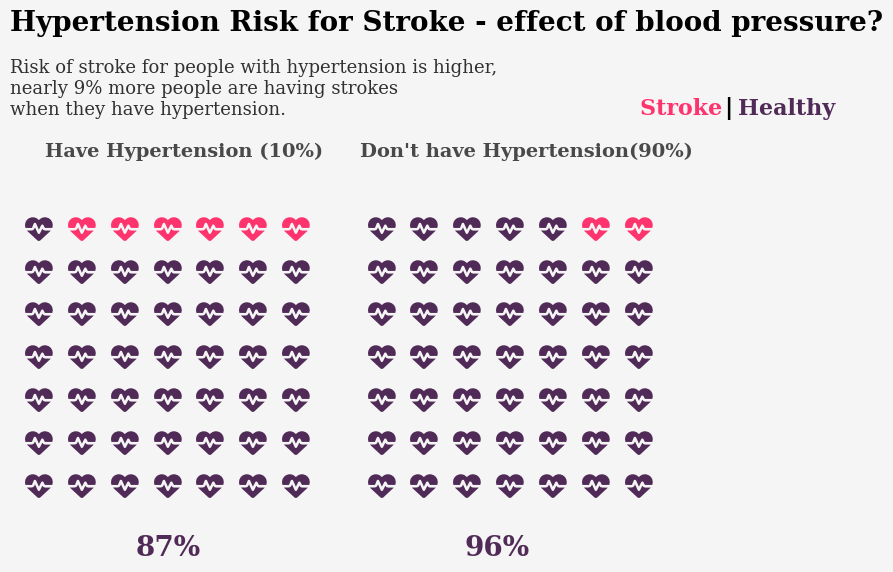

In [18]:
# Get counts of people with and without hypertension based on stroke status
stroke_hypertension = df[df['stroke'] == 1]['hypertension'].value_counts()
healthy_hypertension = df[df['stroke'] == 0]['hypertension'].value_counts()

# Total counts of people with and without hypertension
no_ht = df['hypertension'].value_counts().values[0]
yes_ht = df['hypertension'].value_counts().values[1]

# Calculate percentage of people with and without hypertension who had a stroke
stroke_no_ht = int(round(stroke_hypertension.values[0] / no_ht * 100, 0))
stroke_yes_ht = int(round(stroke_hypertension.values[1] / yes_ht * 100, 0))
# Calculate percentage of people with and without hypertension who did not have a stroke
healthy_no_ht = int(round(healthy_hypertension.values[0] / no_ht * 100, 0))
healthy_yes_ht = int(round(healthy_hypertension.values[1] / yes_ht * 100, 0))

# Get overall percentage of people with and without hypertension
no_ht_per = int(round(no_ht / (no_ht + yes_ht) * 100, 0))
yes_ht_per = int(round(yes_ht / (no_ht + yes_ht) * 100, 0))

# Create the Waffle plot
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(7,7),
                 facecolor='#f6f5f5',
                 dpi=100,
                 interval_ratio_y=0.005,
                 interval_ratio_x=0.005,
                 plot_anchor='C',
                 icon_size=20,
                 icon_legend=False,
                 alpha=1,
                 vertical=True,
                 starting_location='NE',
                 plots={
                     121: {  # First subplot for people with hypertension
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_yes_ht, healthy_yes_ht],
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'heartbeat',
                     },
                     122: {  # Second subplot for people without hypertension
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_no_ht, healthy_no_ht],
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'heartbeat',
                     }
                 }
)

# Adjust space between subplots (if necessary)
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add titles and annotations to explain the Waffle plot
fig.text(0., 0.95, 'Hypertension Risk for Stroke - effect of blood pressure?', 
         {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.83, 'Risk of stroke for people with hypertension is higher,\n'
         'nearly 9% more people are having strokes \nwhen they have hypertension.', 
         {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha=0.8)

# Additional annotations for percentages
fig.text(0.18, 0.20, '{}%'.format(healthy_yes_ht), 
         {'font':'Serif', 'size':20, 'weight':'bold', 'color':'#512b58'}, alpha=1)
fig.text(0.65, 0.20, '{}%'.format(healthy_no_ht), 
         {'font':'Serif', 'size':20, 'weight':'bold', 'color':'#512b58'}, alpha=1)
fig.text(0.05, 0.77, 'Have Hypertension ({}%)'.format(yes_ht_per), 
         {'font':'Serif', 'size':14, 'weight':'bold', 'color':'black'}, alpha=0.7)
fig.text(0.5, 0.77, "Don't have Hypertension({}%)".format(no_ht_per), 
         {'font':'Serif', 'size':14, 'weight':'bold', 'color':'black'}, alpha=0.7)

# Legend-like information
fig.text(0.90, 0.83, 'Stroke ', {'font': 'Serif', 'weight':'bold', 'size': 16, 'color': '#fe346e'})
fig.text(1.02, 0.83, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
fig.text(1.04, 0.83, 'Healthy', {'font': 'Serif', 'weight':'bold', 'size': 16, 'color': '#512b58'}, alpha=1)

# Display the plot
plt.show()

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Smoking Distribution</div>

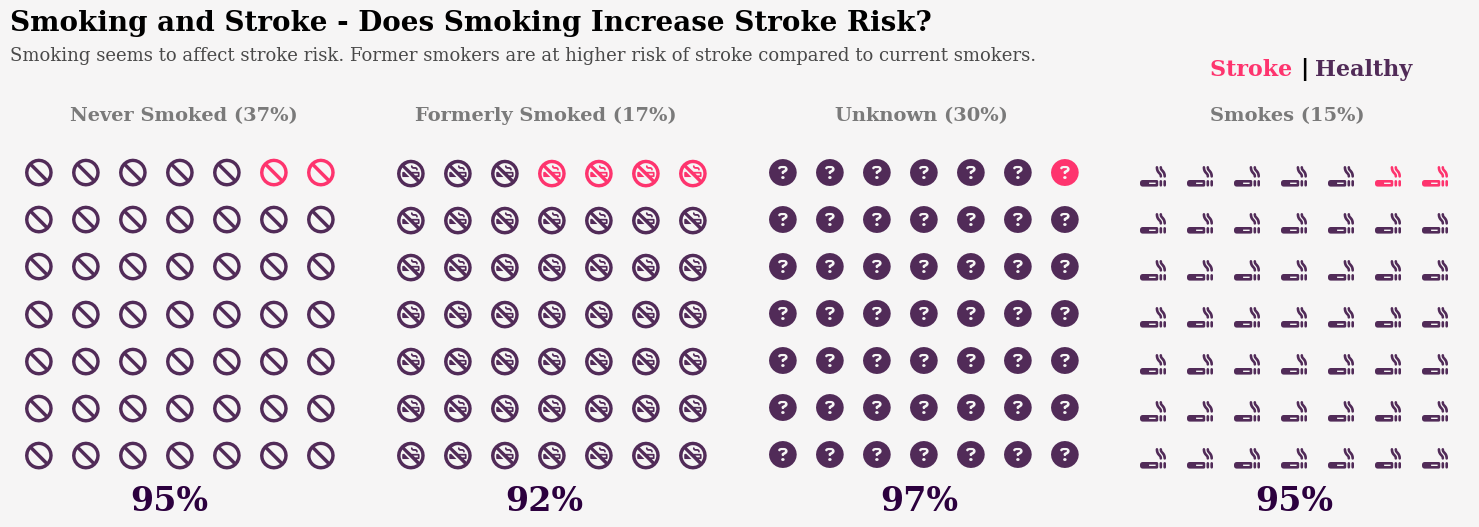

In [19]:
# Get counts of smoking status for all, stroke, and healthy groups
smoking_status_count = df_eda['smoking_status'].value_counts()
stroke_smoke_count = df_eda[df_eda['stroke'] == 1]['smoking_status'].value_counts()
healthy_smoke_count = df_eda[df_eda['stroke'] == 0]['smoking_status'].value_counts()

# Define overall counts for each smoking category
never_smoked_count = smoking_status_count['never smoked']
unknown_smoke_count = smoking_status_count['Unknown']
former_smoker_count = smoking_status_count['formerly smoked']
current_smoker_count = smoking_status_count['smokes']

# Calculate stroke percentages for each smoking category
stroke_never_smoked_pct = int(round(stroke_smoke_count['never smoked'] / never_smoked_count * 100, 0))
stroke_unknown_smoke_pct = int(round(stroke_smoke_count['Unknown'] / unknown_smoke_count * 100, 0))
stroke_former_smoker_pct = int(round(stroke_smoke_count['formerly smoked'] / former_smoker_count * 100, 0))
stroke_current_smoker_pct = int(round(stroke_smoke_count['smokes'] / current_smoker_count * 100, 0))

# Calculate healthy percentages for each smoking category
healthy_never_smoked_pct = int(round(healthy_smoke_count['never smoked'] / never_smoked_count * 100, 0))
healthy_unknown_smoke_pct = int(round(healthy_smoke_count['Unknown'] / unknown_smoke_count * 100, 0))
healthy_former_smoker_pct = int(round(healthy_smoke_count['formerly smoked'] / former_smoker_count * 100, 0))
healthy_current_smoker_pct = int(round(healthy_smoke_count['smokes'] / current_smoker_count * 100, 0))

# Calculate total percentages for each smoking category
never_smoked_pct = int(round(never_smoked_count / smoking_status_count.sum() * 100, 0))
unknown_smoke_pct = int(round(unknown_smoke_count / smoking_status_count.sum() * 100, 0))
former_smoker_pct = int(round(former_smoker_count / smoking_status_count.sum() * 100, 0))
current_smoker_pct = int(round(current_smoker_count / smoking_status_count.sum() * 100, 0))

# Define common parameters for the waffle subplots
common_waffle_params = {
    'rows': 7,
    'columns': 7,
    'colors': ['#fe346e', '#512b58'],
    'vertical': True,
    'interval_ratio_x': 0.005,
    'interval_ratio_y': 0.005,
    'icon_legend': False,
    'plot_anchor': 'C',
    'alpha': 0.8,
    'starting_location': 'NE'
}

# Create Waffle plot
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(15, 15),
                 facecolor='#f6f5f5', dpi=100,
                 
                 plots={
                     141: {  # Never smoked category
                         **common_waffle_params,
                         'values': [stroke_never_smoked_pct, healthy_never_smoked_pct],
                         'icons': 'ban',
                         'icon_size': 20
                     },
                     142: {  # Formerly smoked category
                         **common_waffle_params,
                         'values': [stroke_former_smoker_pct, healthy_former_smoker_pct],
                         'icons': 'smoking-ban',
                         'icon_size': 20
                     },
                     143: {  # Unknown smoking status category
                         **common_waffle_params, 
                         'values': [stroke_unknown_smoke_pct, healthy_unknown_smoke_pct],
                         'icons': 'question-circle',
                         'icon_size': 20
                     },
                     144: { # Current smoker category
                         **common_waffle_params,
                         'values': [stroke_current_smoker_pct, healthy_current_smoker_pct],
                         'icons': 'smoking',
                         'icon_size': 15,
                         'interval_ratio_x': 0.006,
                         'interval_ratio_y': 0.006
                     }
                 }
)

# Adjust spacing between subplots
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add main title and description
fig.text(0, 0.68, 'Smoking and Stroke - Does Smoking Increase Stroke Risk?', 
         {'font': 'Serif', 'size': 20, 'color': 'black', 'weight': 'bold'})
fig.text(0, 0.66, 'Smoking seems to affect stroke risk. Former smokers are at higher risk of stroke compared to current smokers.', 
         {'font': 'Serif', 'size': 13, 'color': 'black', 'weight': 'normal'}, alpha=0.7)

# Add percentage annotations for each smoking category
fig.text(0.08, 0.36, '{}%'.format(healthy_never_smoked_pct), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.33, 0.36, '{}%'.format(healthy_former_smoker_pct), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.58, 0.36, '{}%'.format(healthy_unknown_smoke_pct), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.83, 0.36, '{}%'.format(healthy_current_smoker_pct), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)

# Add category labels with total percentages
fig.text(0.04, 0.62, 'Never Smoked ({}%)'.format(never_smoked_pct), {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.27, 0.62, 'Formerly Smoked ({}%)'.format(former_smoker_pct), {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.55, 0.62, 'Unknown ({}%)'.format(unknown_smoke_pct), {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.8, 0.62, 'Smokes ({}%)'.format(current_smoker_pct), {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': 'black'}, alpha=0.5)

# Add legend for stroke and no stroke
fig.text(0.8, 0.65, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#fe346e'})
fig.text(0.86, 0.65, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
fig.text(0.87, 0.65, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#512b58'})

# Show the plot
plt.show()

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Work Distribution</div>

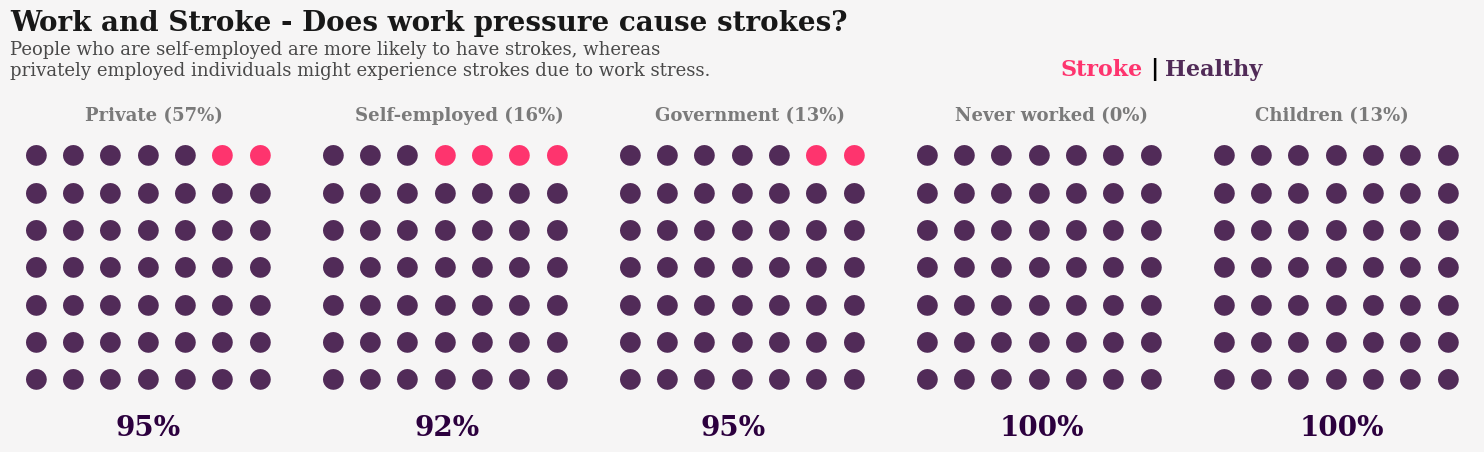

In [20]:
# Value counts for work type overall and by stroke occurrence
work_counts = df['work_type'].value_counts()
stroke_work_counts = df[df['stroke'] == 1]['work_type'].value_counts()
healthy_work_counts = df[df['stroke'] == 0]['work_type'].value_counts()

# Total counts for each work type category
private_work = work_counts.values[0]
self_employed = work_counts.values[1]
children = work_counts.values[2]
gov_work = work_counts.values[3]
never_worked = work_counts.values[4]

# Stroke percentage by work type
stroke_private_work = int(round(stroke_work_counts.values[0] / private_work * 100, 0))
stroke_self_employed = int(round(stroke_work_counts.values[1] / self_employed * 100, 0))
stroke_children = int(round(stroke_work_counts.values[3] / children * 100, 0))
stroke_gov_work = int(round(stroke_work_counts.values[2] / gov_work * 100, 0))
stroke_never_worked = 0  # No strokes for those who never worked

# Healthy (no stroke) percentage by work type
healthy_private_work = int(round(healthy_work_counts.values[0] / private_work * 100, 0))
healthy_self_employed = int(round(healthy_work_counts.values[1] / self_employed * 100, 0))
healthy_children = int(round(healthy_work_counts.values[2] / children * 100, 0))
healthy_gov_work = int(round(healthy_work_counts.values[3] / gov_work * 100, 0))
healthy_never_worked = int(round(healthy_work_counts.values[4] / never_worked * 100, 0))

# Percentages of overall work distribution
private_work_perc = int(round(private_work / (private_work + self_employed + children + gov_work + never_worked) * 100, 0))
self_employed_perc = int(round(self_employed / (private_work + self_employed + children + gov_work + never_worked) * 100, 0))
children_perc = int(round(children / (private_work + self_employed + children + gov_work + never_worked) * 100, 0))
gov_work_perc = int(round(gov_work / (private_work + self_employed + children + gov_work + never_worked) * 100, 0))
never_worked_perc = int(round(never_worked / (private_work + self_employed + children + gov_work + never_worked) * 100, 0))

# Waffle chart for work type and stroke occurrence
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(15, 15),
                 facecolor='#f6f5f5', dpi=100,
                 vertical=True,
                 plot_anchor='C',
                 icon_legend=False,
                 alpha=0.2,
                 interval_ratio_x= 0.006,
                 interval_ratio_y= 0.006,
                 starting_location= 'NE',
                 plots={
                     151: {     
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_private_work, healthy_private_work],
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'circle',
                         'icon_size': 15,
                     },
                     152: { 
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_self_employed, healthy_self_employed],         
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'circle',
                         'icon_size': 15,
                         'alpha': 0.2
                     },
                     153: {     
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_gov_work, healthy_gov_work],
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'circle',
                         'icon_size': 15,
                     },
                     154: { 
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_never_worked, healthy_never_worked],         
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'circle',
                         'icon_size': 15,
                     },
                     155: { 
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_children, healthy_children],         
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'circle',
                         'icon_size': 15,
                     }
                 })
# Adjust spacing between subplots
fig.subplots_adjust(wspace=2000, hspace=2000)

# Adding text annotations for each subplot
fig.text(0, 0.65, 'Work and Stroke - Does work pressure cause strokes?', 
         {'font': 'Serif', 'size': 20, 'color': 'black', 'weight': 'bold'}, alpha=0.9)
fig.text(0, 0.62, 
         'People who are self-employed are more likely to have strokes, whereas\n'
         'privately employed individuals might experience strokes due to work stress.', 
         {'font': 'Serif', 'size': 13, 'color': 'black'}, alpha=0.7)

# Healthy work type percentage text
fig.text(0.07, 0.38, '{}%'.format(healthy_private_work), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.27, 0.38, '{}%'.format(healthy_self_employed), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.46, 0.38, '{}%'.format(healthy_gov_work), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.66, 0.38, '{}%'.format(healthy_never_worked), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.86, 0.38, '{}%'.format(healthy_children), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)

# Work type category labels with percentages
fig.text(0.05, 0.59, 'Private ({0}%)'.format(private_work_perc), {'font': 'Serif', 'size': 13, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.23, 0.59, 'Self-employed ({0}%)'.format(self_employed_perc), {'font': 'Serif', 'size': 13, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.43, 0.59, 'Government ({0}%)'.format(gov_work_perc), {'font': 'Serif', 'size': 13, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.63, 0.59, 'Never worked ({0}%)'.format(never_worked_perc), {'font': 'Serif', 'size': 13, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.83, 0.59, 'Children ({0}%)'.format(children_perc), {'font': 'Serif', 'size': 13, 'weight': 'bold', 'color': 'black'}, alpha=0.5)

# Legend indicating stroke and no stroke colors
fig.text(0.7, 0.62, 'Stroke', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#fe346e'})
fig.text(0.76, 0.62, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
fig.text(0.77, 0.62, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#512b58'}, alpha=1)

# Display the plot
plt.show()

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Heart Disease Distribution</div>

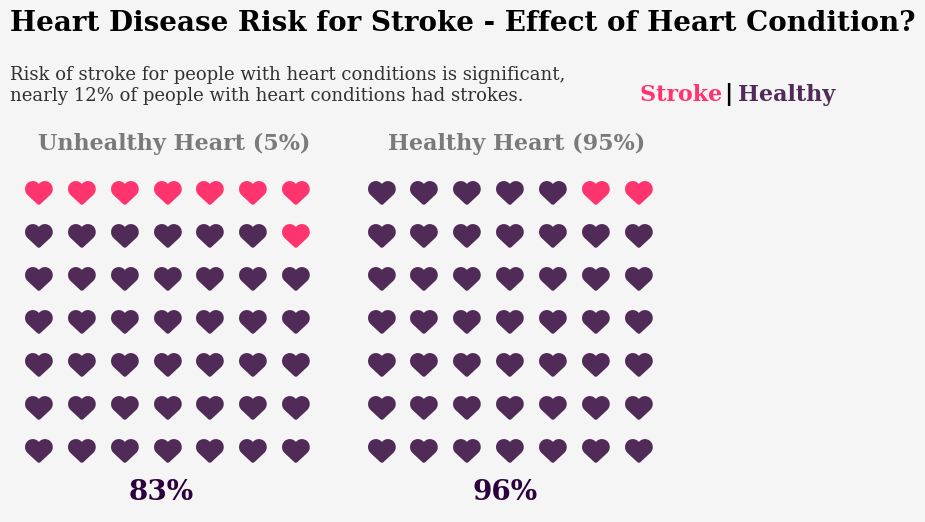

In [21]:
# Get counts of individuals with and without heart disease based on stroke status.
stroke_heart_disease_status = df[df['stroke'] == 1]['heart_disease'].value_counts()
healthy_heart_disease_status = df[df['stroke'] == 0]['heart_disease'].value_counts()

# Total counts of individuals with and without heart disease.
healthy_heart_count = df['heart_disease'].value_counts().values[0]
unhealthy_heart_count = df['heart_disease'].value_counts().values[1]

# Calculate percentage of individuals with and without heart disease who had a stroke.
stroke_healthy_heart_percentage = int(round(stroke_heart_disease_status.values[0] / healthy_heart_count * 100, 0))
stroke_unhealthy_heart_percentage = int(round(stroke_heart_disease_status.values[1] / unhealthy_heart_count * 100, 0))

# Calculate percentage of individuals with and without heart disease who did not have a stroke.
healthy_healthy_heart_percentage = int(round(healthy_heart_disease_status.values[0] / healthy_heart_count * 100, 0))
healthy_unhealthy_heart_percentage = int(round(healthy_heart_disease_status.values[1] / unhealthy_heart_count * 100, 0))

# Calculate overall percentage of individuals with and without heart disease.
unhealthy_heart_overall_percentage = int(round(unhealthy_heart_count / (unhealthy_heart_count + healthy_heart_count) * 100, 0))
healthy_heart_overall_percentage = int(round(healthy_heart_count / (unhealthy_heart_count + healthy_heart_count) * 100, 0))

# Create the Waffle plot to visualize individuals based on heart disease and stroke status.
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(7, 7),
                 facecolor='#f6f5f5',
                 dpi=100,
                 
                 plots={
                     121: {
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_unhealthy_heart_percentage, healthy_unhealthy_heart_percentage],
                         'colors': ['#fe346e', '#512b58'],  # Colors for stroke and healthy.
                         'vertical': True,
                         'interval_ratio_x': 0.005,
                         'interval_ratio_y': 0.005,
                         'icons': 'heart',  # Heart icon to represent heart disease status.
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     122: {
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_healthy_heart_percentage, healthy_healthy_heart_percentage],
                         'colors': ['#fe346e', '#512b58'],
                         'vertical': True,
                         'interval_ratio_x': 0.005,
                         'interval_ratio_y': 0.005,
                         'icons': 'heart',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     }
                 }
)

# Adjust space between subplots.
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add titles and explanatory text to the Waffle plot.
fig.text(0., 0.9, 'Heart Disease Risk for Stroke - Effect of Heart Condition?', 
         {'font': 'Serif', 'size': 20, 'color': 'black', 'weight': 'bold'})
fig.text(0., 0.8, 'Risk of stroke for people with heart conditions is significant,\nnearly 12% of people with heart conditions had strokes.', 
         {'font': 'Serif', 'size': 13, 'color': 'black', 'weight': 'normal'}, alpha=0.8)

# Additional annotations for percentage representation of healthy individuals.
fig.text(0.24, 0.22, 'ooo', {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': '#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': '#f6f5f5'})
fig.text(0.17, 0.23, '{}%'.format(healthy_unhealthy_heart_percentage), 
         {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.66, 0.23, '{}%'.format(healthy_healthy_heart_percentage), 
         {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)

# Annotate with overall percentage of individuals with and without heart disease.
fig.text(0.04, 0.73, 'Unhealthy Heart ({}%)'.format(unhealthy_heart_overall_percentage), 
         {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.54, 0.73, 'Healthy Heart ({}%)'.format(healthy_heart_overall_percentage), 
         {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)

# Add legend-like labels for stroke and healthy categories.
fig.text(0.9, 0.8, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#fe346e'})
fig.text(1.02, 0.8, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
fig.text(1.04, 0.8, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#512b58'}, alpha=1)

# Display the plot.
plt.show()

##
<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">2.4 Relationship between two continuous variables</div>

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Relationship between Strokes with Gender & Marriage</div>

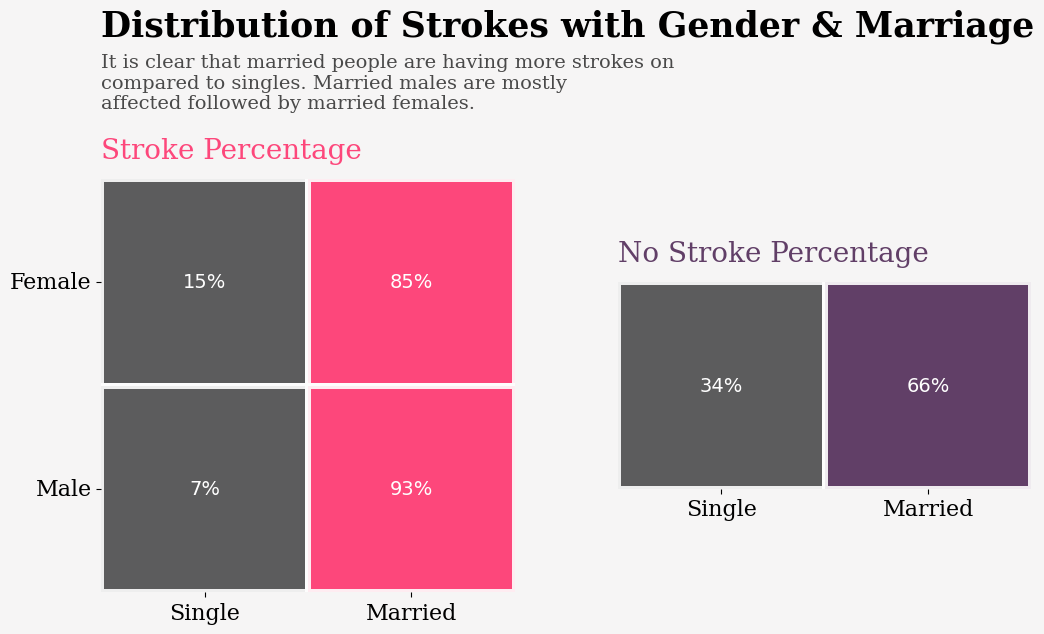

In [22]:
# Create a figure with two subplots (1 row, 2 columns)
fig = plt.figure(figsize=(12,6), dpi=100)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25, hspace=0.5)  # Adjust spacing between plots

# Add subplots
ax0 = fig.add_subplot(gs[0,0])  # First subplot
ax1 = fig.add_subplot(gs[0,1])  # Second subplot

# Set background color for the figure and subplots
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Create separate datasets for individuals with and without strokes
healthy = df_eda[df_eda['stroke'] == 0]  # Individuals with no stroke
stroke = df_eda[df_eda['stroke'] == 1]  # Individuals with stroke

# Define color schemes for heatmaps
col1 = ["#4b4b4c", "#fe346e"]  # Color scheme for the stroke group
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#4b4b4c", "#512b58"]  # Color scheme for the no-stroke group
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Create crosstab tables for gender and marital status, normalized by row (gender)
stroke = pd.crosstab(stroke['gender'], [stroke['ever_married']], normalize='index')
no_stroke = pd.crosstab(healthy['gender'], [healthy['ever_married']], normalize='index')

# Plot heatmap for the stroke group (left subplot)
sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, 
            cmap=col1, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Plot heatmap for the no-stroke group (right subplot)
sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, 
            cmap=col2, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Add title and description to the first subplot
ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Marriage', 
         {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.34, 'It is clear that married people are having more strokes on\ncompared to singles. Married males are mostly\naffected followed by married females.', 
         {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add labels for stroke and no-stroke heatmaps
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set custom labels for the x-axis (Marital status) and y-axis (Gender) for both subplots
ax0.axes.set_xticklabels(['Single', 'Married'], fontdict={'font': 'serif', 'color': 'black', 'size': 16})
ax1.axes.set_xticklabels(['Single', 'Married'], fontdict={'font': 'serif', 'color': 'black', 'size': 16})
ax0.axes.set_yticklabels(['Female', 'Male'], fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Remove axis labels for both subplots for a cleaner look
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide the y-axis for the second subplot (no-stroke)
ax1.axes.get_yaxis().set_visible(False)

# Show the final plot
plt.show()

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Relationship between Strokes with Gender & Work Type</div>

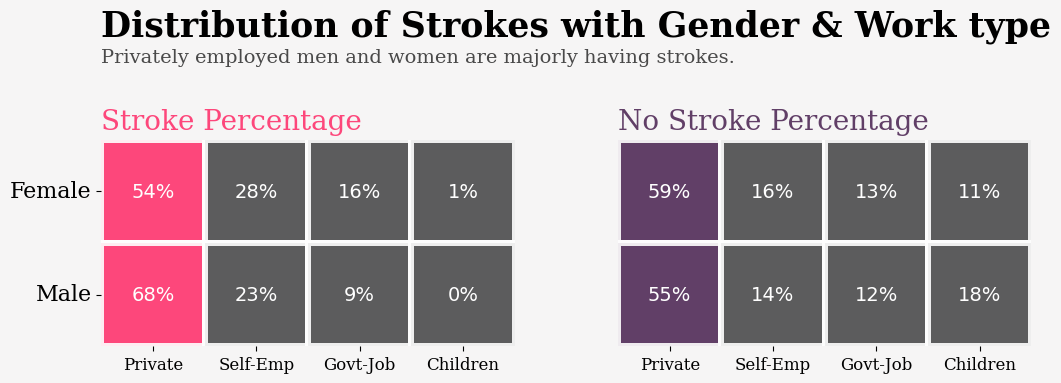

In [23]:
# Create a figure with two subplots, size 12x6 inches, and set dpi to 100 for resolution
fig = plt.figure(figsize=(12, 6), dpi=100)
gs = fig.add_gridspec(1, 2)  # Create a grid specification with 1 row and 2 columns for subplots
gs.update(wspace=0.25, hspace=0.5)  # Adjust spacing between the subplots (horizontal and vertical)

# Add two subplots to the figure
ax0 = fig.add_subplot(gs[0, 0])  # First subplot for stroke data
ax1 = fig.add_subplot(gs[0, 1])  # Second subplot for no-stroke data

# Set the background color for the entire figure and subplots
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Separate data into two subsets: 'healthy' for individuals with no stroke, and 'stroke' for those with a stroke
healthy = df_eda[df_eda['stroke'] == 0]  # No stroke group
stroke = df_eda[df_eda['stroke'] == 1]   # Stroke group

# Define the order of gender and work types for consistency in heatmap
gender_order = ['Female', 'Male']  # Ensure Female is shown first, followed by Male
work_order = ['Private', 'Self-employed', 'Govt_job', 'children']  # Specific order of work types

# Define two color schemes for the heatmaps
col1 = ["#4b4b4c", "#fe346e"]  # Stroke heatmap color: Grey and Pink
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#4b4b4c", "#512b58"]  # No stroke heatmap color: Grey and Purple
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Create cross-tabulation for gender and work type for stroke data, normalized by gender
# This will give the percentage distribution for each work type by gender in the stroke group
stroke = pd.crosstab(stroke['gender'], [stroke['work_type']], normalize='index').loc[gender_order, work_order]

# Create similar cross-tabulation for the no-stroke group, normalized by gender
no_stroke = pd.crosstab(healthy['gender'], [healthy['work_type']], normalize='index').loc[gender_order, work_order]

# Plot heatmap for stroke data (ax0)
sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col1, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Plot heatmap for no-stroke data (ax1)
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col2, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Add title and description to the first subplot (stroke group)
ax0.text(0, -1.0, 'Distribution of Strokes with Gender & Work type', 
         {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.75, 'Privately employed men and women are majorly having strokes.', 
         {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add labels indicating which subplot represents stroke and no-stroke data
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set custom x-axis labels for work types (for both stroke and no-stroke heatmaps)
ax0.axes.set_xticklabels(['Private', 'Self-Emp', 'Govt-Job', 'Children'], fontdict={'font': 'serif', 'color': 'black', 'size': 12})
ax1.axes.set_xticklabels(['Private', 'Self-Emp', 'Govt-Job', 'Children'], fontdict={'font': 'serif', 'color': 'black', 'size': 12})

# Set y-axis labels for gender in the first subplot (stroke group)
ax0.axes.set_yticklabels(gender_order, fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Remove axis labels for a cleaner look
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide y-axis for the second subplot (no-stroke data) to avoid redundancy
ax1.axes.get_yaxis().set_visible(False)

# Display the final plot with the two heatmaps
plt.show()

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Relationship between Strokes with Gender & Smorking Status</div>

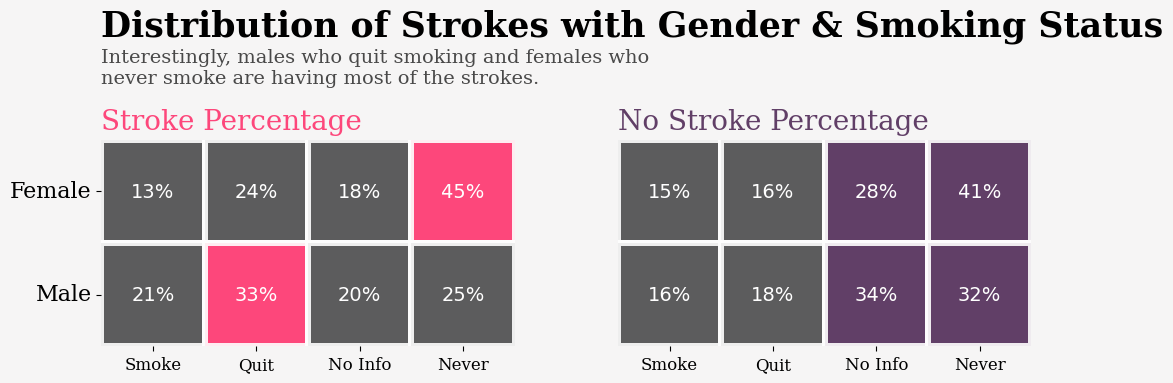

In [24]:
# Create a figure with 1 row and 2 columns of subplots, setting figure size to 12x6 inches and dpi to 100
fig = plt.figure(figsize=(12, 6), dpi=100)
gs = fig.add_gridspec(1, 2)  # Grid for 2 subplots (1 row, 2 columns)
gs.update(wspace=0.25, hspace=0.5)  # Adjust spacing between the plots

# Add subplots to the figure: ax0 for stroke data, ax1 for no-stroke data
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Set background color for the figure and both subplots
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Separate the data into two groups: stroke (people who had a stroke) and healthy (no stroke)
healthy = df_eda[df_eda['stroke'] == 0]  # No stroke group
stroke = df_eda[df_eda['stroke'] == 1]   # Stroke group

# Define the specific order for gender and smoking status categories for consistency in the plots
gender_order = ['Female', 'Male']
smoking_order = ['smokes', 'formerly smoked', 'Unknown', 'never smoked']

# Define two color schemes for the heatmaps
col1 = ["#4b4b4c", "#fe346e"]  # Stroke heatmap color: Grey and Pink
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)

col2 = ["#4b4b4c", "#512b58"]  # No-stroke heatmap color: Grey and Purple
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Generate cross-tabulation (gender vs. smoking status) for the stroke group, normalized by gender
stroke = pd.crosstab(stroke['gender'], [stroke['smoking_status']], normalize='index').loc[gender_order, smoking_order]

# Generate similar cross-tabulation for the no-stroke group, also normalized by gender
no_stroke = pd.crosstab(healthy['gender'], [healthy['smoking_status']], normalize='index').loc[gender_order, smoking_order]

# Plot heatmap for the stroke group on the left subplot (ax0)
sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col1, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Plot heatmap for the no-stroke group on the right subplot (ax1)
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col2, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Add a title and descriptive text above the first subplot (stroke group)
ax0.text(0, -1.0, 'Distribution of Strokes with Gender & Smoking Status', 
         {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})

# Add description highlighting the insights derived from the stroke data
ax0.text(0, -0.55, 'Interestingly, males who quit smoking and females who \nnever smoke are having most of the strokes.', 
         {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add labels indicating stroke and no-stroke data percentages below each plot
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set custom x-axis labels (simplified) for smoking status categories for both subplots
ax0.set_xticklabels(['Smoke', 'Quit', 'No Info', 'Never'], fontdict={'font': 'serif', 'color': 'black', 'size': 12})
ax1.set_xticklabels(['Smoke', 'Quit', 'No Info', 'Never'], fontdict={'font': 'serif', 'color': 'black', 'size': 12})

# Set custom y-axis labels (gender) for the stroke group heatmap, aligned vertically
ax0.set_yticklabels(gender_order, fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Clear axis labels for a cleaner look
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide y-axis labels for the no-stroke heatmap to avoid redundancy
ax1.axes.get_yaxis().set_visible(False)

# Display the final figure with both heatmaps
plt.show()

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Relationship between Strokes with Gender & Age</div>

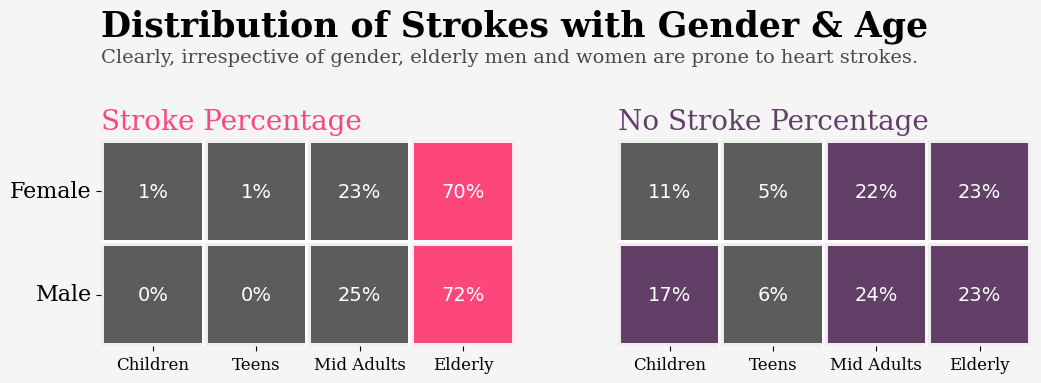

In [25]:
# Create a figure with 1 row and 2 columns of subplots, setting figure size to 12x6 inches and dpi to 100
fig = plt.figure(figsize=(12, 6), dpi=100)
gs = fig.add_gridspec(1, 2)  # Grid for 2 subplots (1 row, 2 columns)
gs.update(wspace=0.25, hspace=0.5)  # Adjust spacing between the plots

# Add subplots to the figure: ax0 for stroke data, ax1 for no-stroke data
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Set background color for the figure and both subplots
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Separate the data into two groups: stroke (people who had a stroke) and healthy (no stroke)
healthy = df_eda[df_eda['stroke'] == 0]  # No stroke group
stroke = df_eda[df_eda['stroke'] == 1]   # Stroke group

# Define the specific order for gender and age categories for consistency in the plots
gender_order = ['Female', 'Male']
age_order = ['Children', 'Teens', 'Mid Adults', 'Elderly']

# Define two color schemes for the heatmaps
col1 = ["#4b4b4c", "#fe346e"]  # Stroke heatmap color: Grey and Pink
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)

col2 = ["#4b4b4c", "#512b58"]  # No-stroke heatmap color: Grey and Purple
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Generate cross-tabulation (gender vs. age category) for the stroke group, normalized by gender
stroke = pd.crosstab(stroke['gender'], [stroke['age_cat']], normalize='index').loc[gender_order, age_order]

# Generate similar cross-tabulation for the no-stroke group, also normalized by gender
no_stroke = pd.crosstab(healthy['gender'], [healthy['age_cat']], normalize='index').loc[gender_order, age_order]

# Plot heatmap for the stroke group on the left subplot (ax0)
sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col1, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Plot heatmap for the no-stroke group on the right subplot (ax1)
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col2, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Add a title and descriptive text above the first subplot (stroke group)
ax0.text(0, -1.0, 'Distribution of Strokes with Gender & Age', 
         {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})

# Add description highlighting the key observation that elderly individuals are more prone to strokes
ax0.text(0, -0.75, 'Clearly, irrespective of gender, elderly men and women are prone to heart strokes.', 
         {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add labels indicating stroke and no-stroke data percentages below each plot
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set custom x-axis labels (age categories) for both subplots
ax0.set_xticklabels(age_order, fontdict={'font': 'serif', 'color': 'black', 'size': 12})
ax1.set_xticklabels(age_order, fontdict={'font': 'serif', 'color': 'black', 'size': 12})

# Set custom y-axis labels (gender) for the stroke group heatmap, aligned vertically
ax0.set_yticklabels(gender_order, fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Clear axis labels for a cleaner look
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide y-axis labels for the no-stroke heatmap to avoid redundancy
ax1.axes.get_yaxis().set_visible(False)

# Display the final figure with both heatmaps
plt.show()

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Relationship between Strokes with Gender & Glucose Level</div>

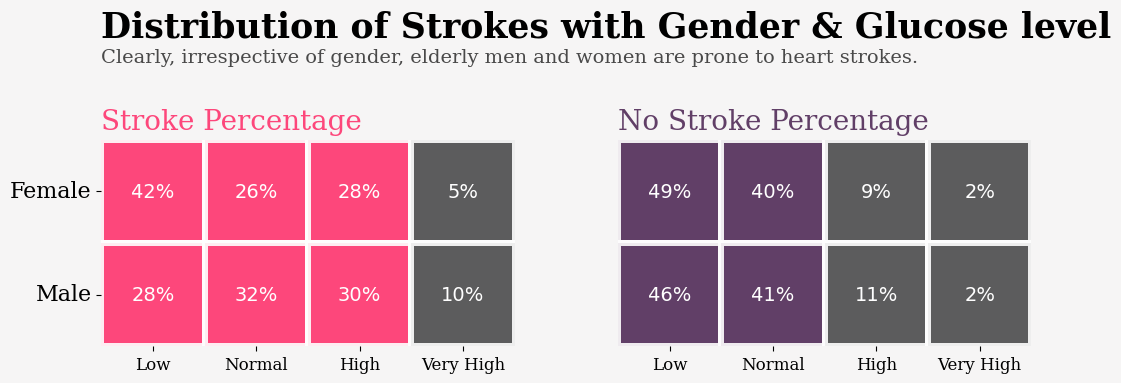

In [26]:
# Create a figure with specific size and resolution
fig = plt.figure(figsize=(12, 6), dpi=100)

# Create a grid specification with 1 row and 2 columns
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25, hspace=0.5)  # Adjust space between subplots

# Add subplots to the grid
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Set the face color for the figure and subplots
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Split data into healthy individuals and stroke patients
healthy = df_eda[df_eda['stroke'] == 0]
stroke = df_eda[df_eda['stroke'] == 1]

# Define the order for gender and glucose categories
gender_order = ['Female', 'Male']
glucose_order = ['Low', 'Normal', 'High', 'Very High']

# Create custom colormaps for the heatmaps
col1 = ["#4b4b4c", "#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#4b4b4c", "#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Create cross-tabulations for stroke and no stroke data
stroke = pd.crosstab(stroke['gender'], [stroke['glucose_cat']], normalize='index').loc[gender_order, glucose_order]
no_stroke = pd.crosstab(healthy['gender'], [healthy['glucose_cat']], normalize='index').loc[gender_order, glucose_order]

# Plot the heatmap for stroke data
sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col1, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Plot the heatmap for no stroke data
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col2, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Add titles and subtitles to the subplots
ax0.text(0, -1., 'Distribution of Strokes with Gender & Glucose level', {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.75, 'Clearly, irrespective of gender, elderly men and women are prone to heart strokes.', {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add titles for the heatmaps
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set custom labels for x and y axes
ax0.axes.set_xticklabels(glucose_order, fontdict={'font': 'serif', 'color': 'black', 'size': 12})
ax1.axes.set_xticklabels(glucose_order, fontdict={'font': 'serif', 'color': 'black', 'size': 12})
ax0.axes.set_yticklabels(gender_order, fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Remove default labels for the axes
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide the y-axis for the second subplot
ax1.axes.get_yaxis().set_visible(False)

# Display the plots
plt.show()

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Relationship between Strokes with Hypertension & Heart Disease</div>

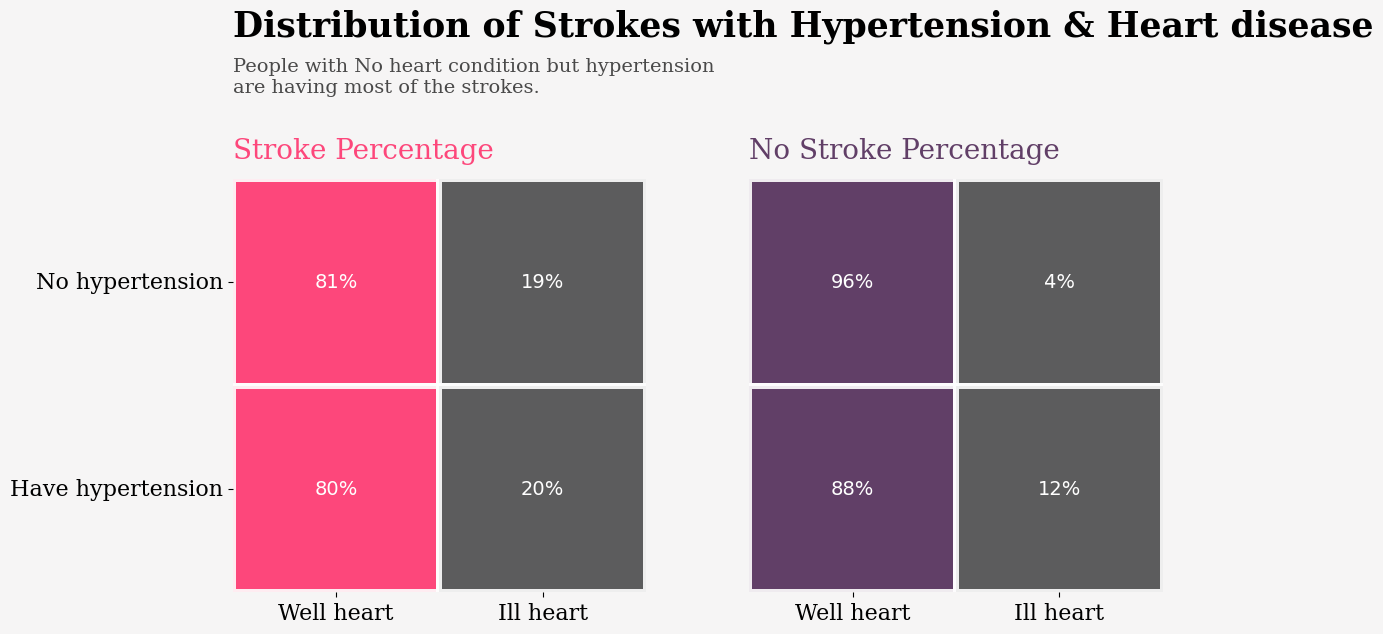

In [27]:
# Create a figure with specified size
fig = plt.figure(figsize=(12, 6))

# Create a GridSpec with 1 row and 2 columns
gs = fig.add_gridspec(1, 2)

# Adjust the spacing between subplots
gs.update(wspace=0.25, hspace=0.5)

# Add subplots to the figure
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Set background color for the figure and axes
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Filter the dataframe based on 'stroke' column
healthy = df_eda[df_eda['stroke'] == 0]
stroke = df_eda[df_eda['stroke'] == 1]

# Define color maps
col1 = ["#4b4b4c", "#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#4b4b4c", "#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Create crosstabs for stroke and no-stroke groups
stroke = pd.crosstab(stroke['hypertension'], [stroke['heart_disease']], normalize='index')
no_stroke = pd.crosstab(healthy['hypertension'], [healthy['heart_disease']], normalize='index')

# Plot heatmap for stroke data
sns.heatmap(ax=ax0, data=stroke, linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col1, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Plot heatmap for no-stroke data
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col2, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Add text annotations to the first subplot
ax0.text(0, -0.69, 'Distribution of Strokes with Hypertension & Heart disease', {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.42, 'People with No heart condition but hypertension \nare having most of the strokes.', {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add text annotations for percentage descriptions
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set x-axis labels for both subplots
ax0.axes.set_xticklabels(['Well heart', 'Ill heart'], fontdict={'font': 'serif', 'color': 'black', 'size': 16})
ax1.axes.set_xticklabels(['Well heart', 'Ill heart'], fontdict={'font': 'serif', 'color': 'black', 'size': 16})

# Set y-axis labels for the first subplot
ax0.axes.set_yticklabels(['No hypertension', 'Have hypertension'], fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Remove axis labels for cleaner look
ax0.set_ylabel('')
ax0.set_xlabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide y-axis for the second subplot
ax1.axes.get_yaxis().set_visible(False)

# Display the plot
plt.show()

##
<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">2.5 Visualization of correlations between various features</div>

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Heatmap: Feature Correlation Overview</div>

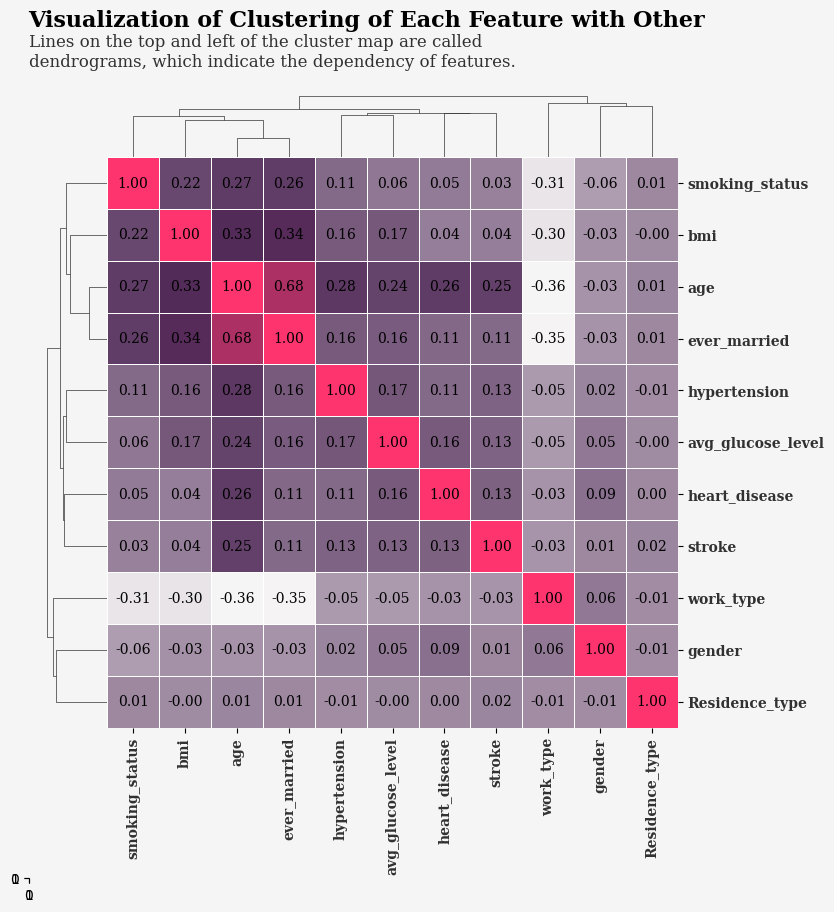

In [28]:
plot_correlation_heatmap(df)

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Boxplot: Feature Value Range and Outliers</div>

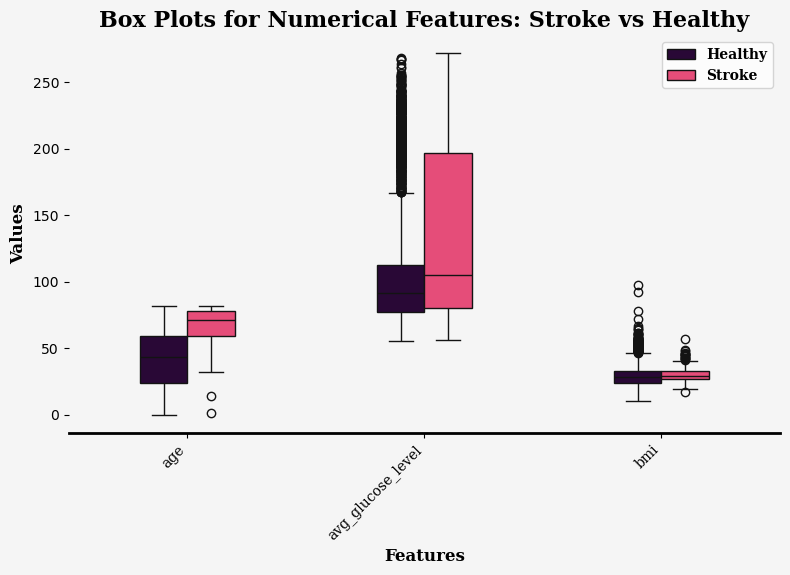

In [29]:
# Plot boxplot for numerical columns identify outliers
numerical_boxplot(df, num_col)

###
<style>
.title{
  color: #fe346e;
  font-size: 21px;
  font-family: Sans-serif;
  font-weight: 600;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
}
</style>
<div class="title">Pairplot: Visualizing Pairwise Feature Relationships</div>

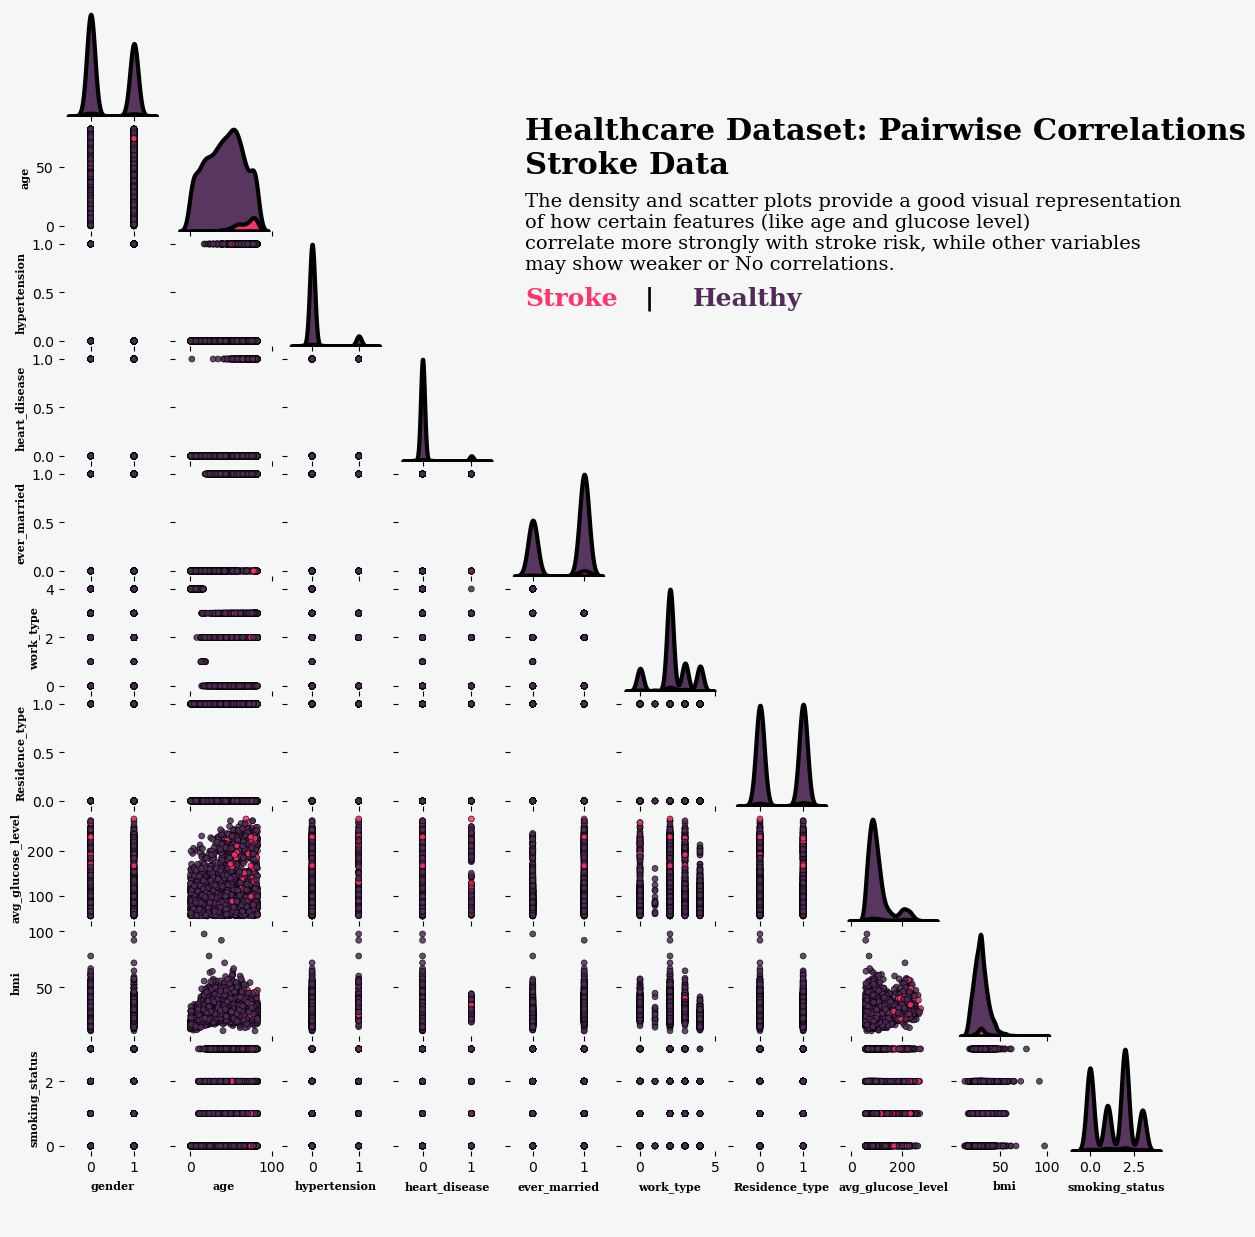

In [30]:
cust_pairplot(df.sample(frac=0.8), 'Stroke Data', 'kde', sign='on')

#
<style>
.border{
  color: white;
  font-weight: 550;
  font-size: 25px;
  font-family: Arial, Helvetica, sans-serif;
  padding: 15px;
  justify-content: center;
  box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
  display: flex;
  max-width: 95%;
  margin:0 auto;
  height: 40px;
  border-radius: 50px;
  transition: top ease 0.5s;
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  top: 5px;
}
.border-important {
  /* background: #fe346e; */
  background-color: #fe346e;
}
.border:hover{
  box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
  top: 0px
}
</style>
<div class="border border-important">3. Model Enhancement: Feature Scaling & Data Balancing</div>


##
<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">3.1 Feature Scaling</div>

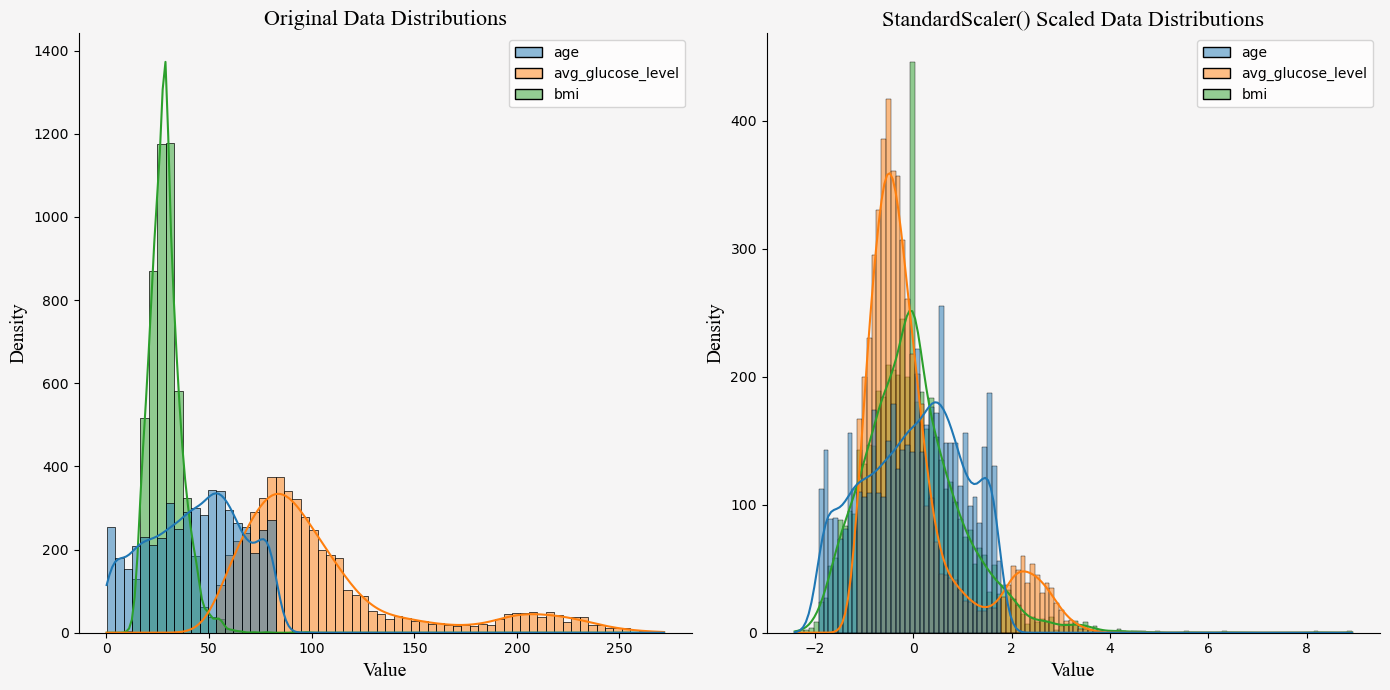

In [31]:
# Feature scaling
df_scaled = df.copy()
df_scaled[num_col] = feature_scaling(df[num_col], 'standard', True)

##
<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">3.2 SMOTE</div>

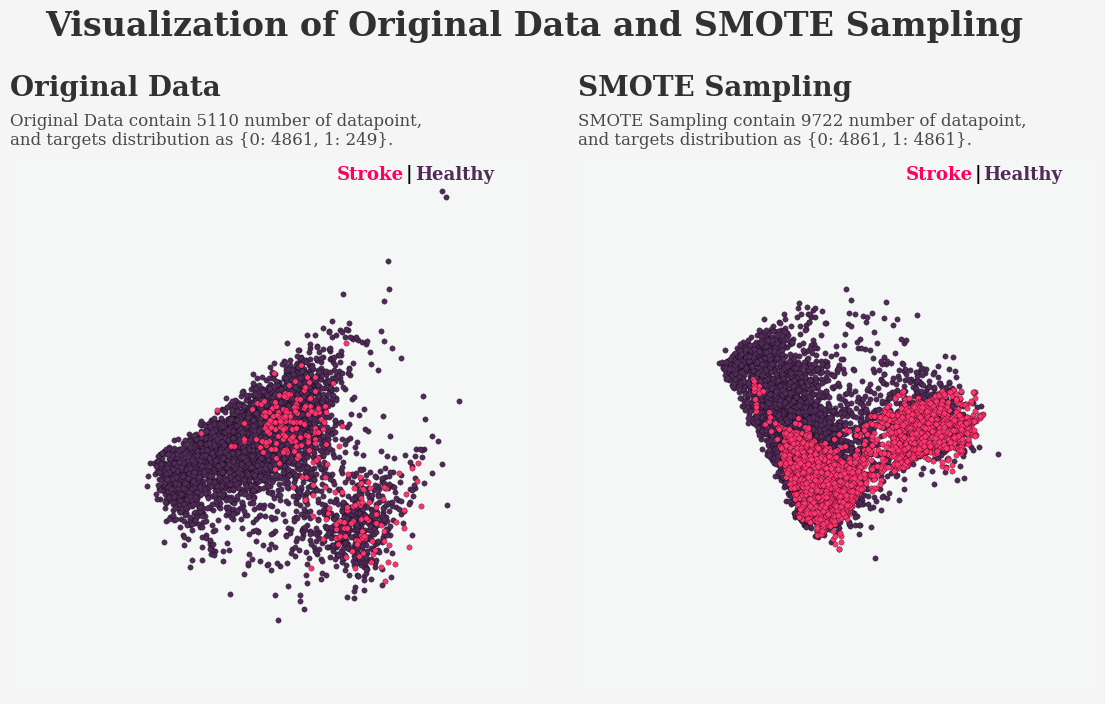

In [32]:
# Define the colors for the two classes (Stroke and Healthy)
colors = ['#fe346e', '#512b58']

# Apply SMOTE resampling on the original dataset
res_df = SMOTE_resample(df_scaled, neighbors=10)

# Create a figure for visualizing the original and SMOTE resampled data
fig = plt.figure(figsize=(14, 7))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
axes = [ax1, ax2]

# Set figure background color
fig.patch.set_facecolor('#f5f5f5')

# Hide the y-axis on both subplots and set background color
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')

# Visualize the original data
ax1 = Sampling(df_scaled[num_col].values, df['stroke'].values.ravel(), 'Original Data', ax=ax1).visualize_data()

# Visualize the SMOTE-resampled data
ax2 = Sampling(res_df[num_col].values, res_df['stroke'].values, 'SMOTE Sampling', ax=ax2).visualize_data()

# Add a title for the entire figure
fig.text(0.15,1.05,'Visualization of Original Data and SMOTE Sampling', {'font': 'serif', 'weight': 'bold', 'size': 24}, alpha = 0.8)

# Display the plots
plt.show()

#
<style>
.border{
  color: white;
  font-weight: 550;
  font-size: 25px;
  font-family: Arial, Helvetica, sans-serif;
  padding: 15px;
  justify-content: center;
  box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
  display: flex;
  max-width: 95%;
  margin:0 auto;
  height: 40px;
  border-radius: 50px;
  transition: top ease 0.5s;
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  top: 5px;
}
.border-important {
  /* background: #fe346e; */
  background-color: #fe346e;
}
.border:hover{
  box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
  top: 0px
}
</style>
<div class="border border-important">4. Modelling</div>


##
<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">4.1 Data Organisation</div>

In [33]:
# Feature selection
# X_train, X_test, y_train, y_test = split_data(res_df, 'stroke', cat_col, num_col, test_size=0.2, k_best=6)

# Split dataset
X = res_df.drop(['stroke'], axis=1)
y = res_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7777, 10), (1945, 10), (7777,), (1945,))

##
<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: left;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">4.2 Classification: XGBoost, LightGBM, RF, CatBoost</div>

In [34]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score

# Train and evaluate model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_cm = confusion_matrix(y_test, y_pred)
    
    model_df = pd.DataFrame(
        data=[
            f1_score(y_test, y_pred),
            accuracy_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            roc_auc_score(y_test, y_pred)
        ],
        columns=[f'{type(model).__name__} Score'],
        index=["F1", "Accuracy", "Recall", "Precision", "ROC AUC Score"]
    )
    
    print(classification_report(y_test, y_pred))
    
    return model, model_df, model_cm

# Train and evaluate RF model
rf_model, rf_df, rf_cm = train_and_evaluate(RandomForestClassifier(), X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

           0       0.96      0.87      0.91       997
           1       0.88      0.97      0.92       948

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945



In [35]:
# Train and evaluate XGBoost model
xgb_model, xgb_df, xgb_cm = train_and_evaluate(XGBClassifier(), X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       997
           1       0.89      0.94      0.92       948

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945



In [36]:
# Train and evaluate LightGBM model
lgbm_model, lgbm_df, lgbm_cm = train_and_evaluate(LGBMClassifier(verbose=-1), X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       997
           1       0.93      0.95      0.94       948

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



In [37]:
from catboost import CatBoostClassifier

# Train and evaluate RandomForest model
cat_model, cat_df, cat_cm = train_and_evaluate(CatBoostClassifier(verbose=0, allow_writing_files=False), X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       997
           1       0.91      0.95      0.93       948

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



#
<style>
.border{
  color: white;
  font-weight: 550;
  font-size: 25px;
  font-family: Arial, Helvetica, sans-serif;
  padding: 15px;
  justify-content: center;
  box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
  display: flex;
  max-width: 95%;
  margin:0 auto;
  height: 40px;
  border-radius: 50px;
  transition: top ease 0.5s;
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  top: 5px;
}
.border-important {
  /* background: #fe346e; */
  background-color: #fe346e;
}
.border:hover{
  box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
  top: 0px
}
</style>
<div class="border border-important">5. Model Evaluation</div>

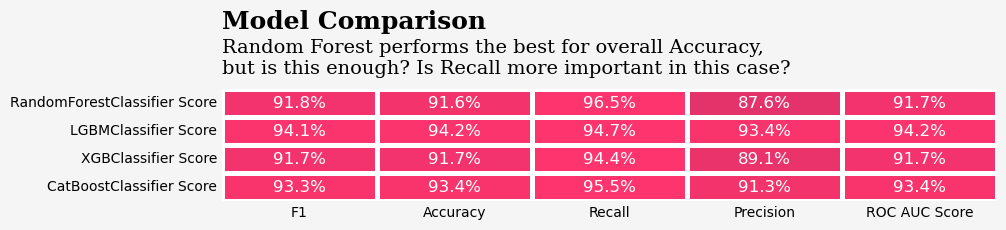

In [38]:
# Concatenate model dataframes and round to 3 decimal places
df_models_combined = round(pd.concat([rf_df, lgbm_df, xgb_df, cat_df], axis=1), 3)

# Define colors for the heatmap
colors = ['grey', '#512b58', '#fe346e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# Set background color for the plot
background_color = "#f5f5f5"

# Create the figure and specify size
fig = plt.figure(figsize=(10, 8))

# Create grid specification for subplots
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)

# Add a subplot in the specified grid position
ax0 = fig.add_subplot(gs[0, :])

# Draw the heatmap with specified properties
sns.heatmap(df_models_combined.T, cmap=colormap, annot=True, fmt=".1%", vmin=0, vmax=0.95, 
            linewidths=2.5, cbar=False, ax=ax0, annot_kws={"fontsize":12})

# Set figure background color
fig.patch.set_facecolor(background_color)

# Set background color for the heatmap
ax0.set_facecolor(background_color)

# Add title and subtitle to the plot
ax0.text(0, -2.15, 'Model Comparison', fontsize=18, fontweight='bold', fontfamily='serif')
ax0.text(0, -0.55, 'Random Forest performs the best for overall Accuracy,\nbut is this enough? Is Recall more important in this case?', 
         fontsize=14, fontfamily='serif')

# Remove tick marks
ax0.tick_params(axis='both', which='both', length=0)

# Show the plot
plt.show()

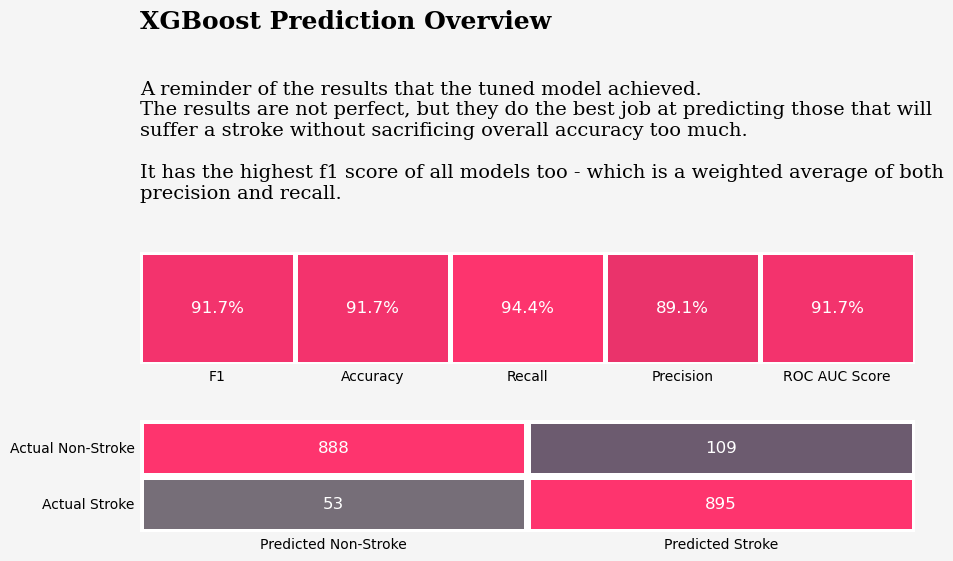

In [39]:
# Define colors for the heatmap
colors = ['grey', '#512b58', '#fe346e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# Set background color for the plot
background_color = "#f5f5f5"

# Create the figure and specify size
fig = plt.figure(figsize=(10, 8))

# Create grid specification for subplots
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)

# Add subplots in the specified grid positions
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])

# Draw the heatmap for XGBoost model predictions
sns.heatmap(xgb_df.T, cmap=colormap, annot=True, fmt=".1%", vmin=0, vmax=0.95, 
            yticklabels='', linewidths=2.5, cbar=False, ax=ax0, annot_kws={"fontsize":12})

# Set background color for the figure and subplots
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Add title and description to the first subplot
ax0.text(0, -2, 'XGBoost Prediction Overview', fontsize=18, fontweight='bold', fontfamily='serif')
ax0.text(0, -0.3,
'''
A reminder of the results that the tuned model achieved.
The results are not perfect, but they do the best job at predicting those that will
suffer a stroke without sacrificing overall accuracy too much.

It has the highest f1 score of all models too - which is a weighted average of both
precision and recall.
''',
fontsize=14, fontfamily='serif')

# Remove tick marks from the first subplot
ax0.tick_params(axis='both', which='both', length=0)

# Draw the heatmap for the confusion matrix of XGBoost predictions
sns.heatmap(xgb_cm, cmap=colormap, annot=True, fmt="d", linewidths=5, cbar=False, ax=ax1,
            yticklabels=['Actual Non-Stroke', 'Actual Stroke'], vmax=500, vmin=0,
            xticklabels=['Predicted Non-Stroke', 'Predicted Stroke'], annot_kws={"fontsize":12})

# Remove tick marks from both subplots
ax0.tick_params(axis='both', which='both', length=0)
ax1.tick_params(axis='both', which='both', length=0)

# Show the plot
plt.show()

#
<style>
.border{
  color: white;
  font-weight: 550;
  font-size: 25px;
  font-family: Arial, Helvetica, sans-serif;
  padding: 15px;
  justify-content: center;
  box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
  display: flex;
  max-width: 95%;
  margin:0 auto;
  height: 40px;
  border-radius: 50px;
  transition: top ease 0.5s;
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  top: 5px;
}
.border-important {
  /* background: #fe346e; */
  background-color: #fe346e;
}
.border:hover{
  box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
  top: 0px
}
</style>
<div class="border border-important">6. Feature Importance Analysis</div>


In [40]:
# Feature Importance Dataframe
feature_importance_df = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_}).sort_values('Importance', ascending=False).reset_index(drop=True)
feature_importance_df[:10].style.background_gradient(cmap=colormap)

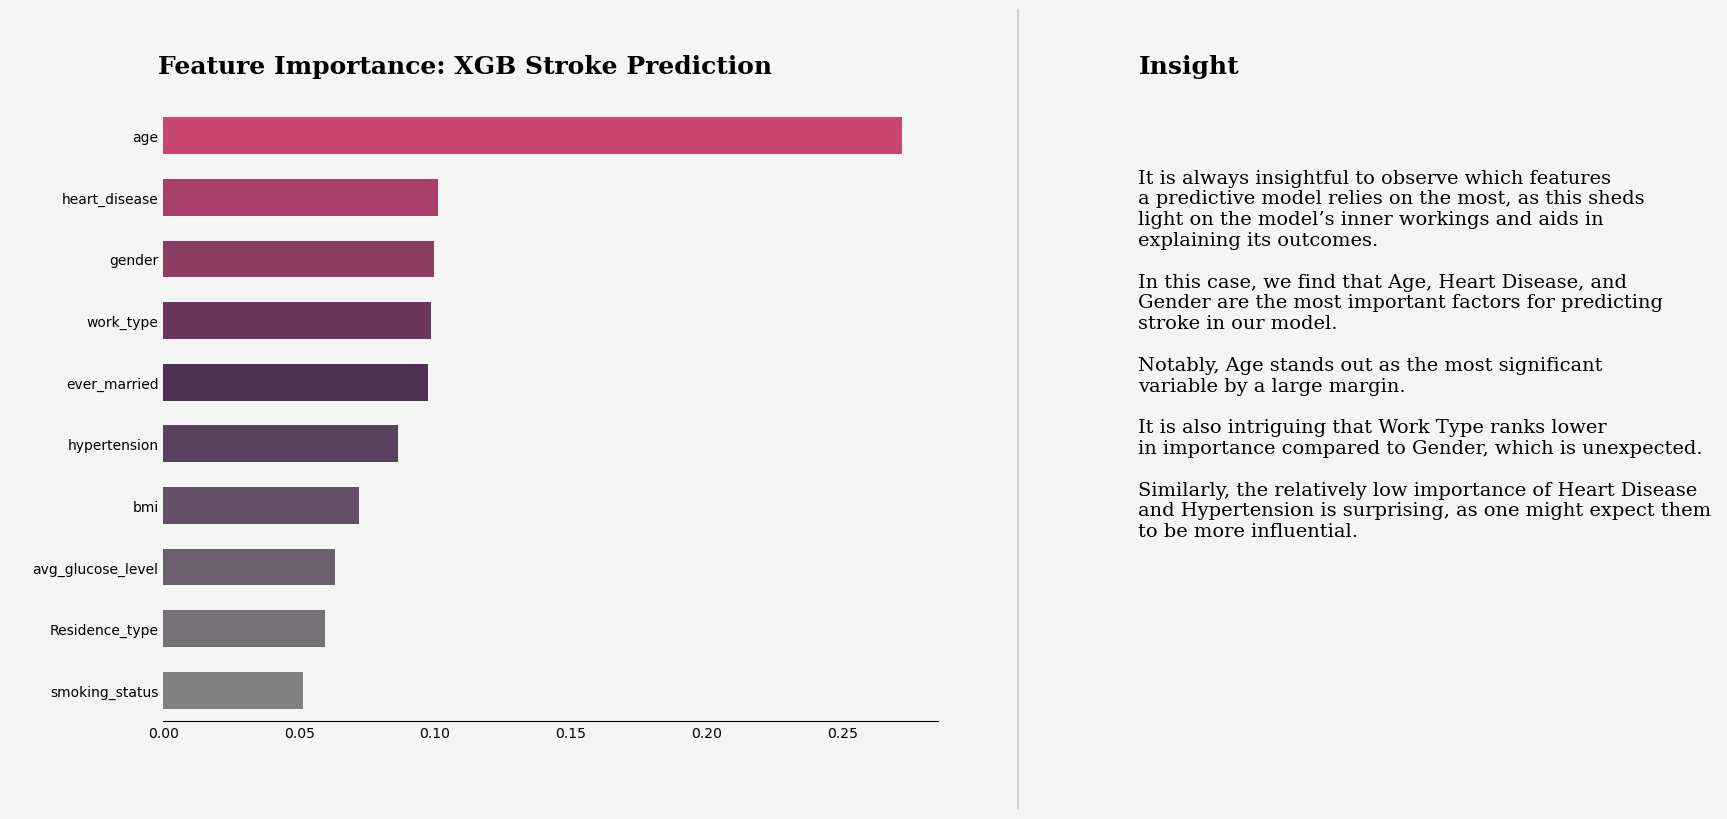

In [41]:
# Import the lines module to create a vertical line on the right side of the figure
import matplotlib.lines as lines

# Set background color for the figure
background_color = "#f5f5f5"

# Create a figure and axis with the specified size and background color
fig, ax = plt.subplots(1, 1, figsize=(10, 8), facecolor=background_color)

# Get the number of unique features in the dataset
num_features = feature_importance_df['Feature'].nunique()

# Generate a list of colors from the colormap in reverse order
palette = [colormap(i/num_features) for i in reversed(range(num_features))]

# Create a barplot showing the feature importance, using the custom color palette
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', ax=ax, palette=palette, hue='Feature', legend=False, width=0.6)

# Set the background color of the axis
ax.set_facecolor(background_color)

# Hide the top, left, and right spines of the plot (borders)
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Add a bold, serif font title at the top left of the figure
fig.text(0.12, 0.92, "Feature Importance: XGB Stroke Prediction", fontsize=18, fontweight='bold', fontfamily='serif')

# Set empty x and y labels with light font style, removing the x-axis label's default positioning
plt.xlabel(" ", fontsize=12, fontweight='light', fontfamily='serif', loc='left', y=-1.5)
plt.ylabel(" ", fontsize=12, fontweight='light', fontfamily='serif')

# Add a bold, serif font subtitle at the top right of the figure (aligned with text on the right)
fig.text(1.1, 0.92, 'Insight', fontsize=18, fontweight='bold', fontfamily='serif')

# Add a multiline text block explaining the insights about the feature importance
fig.text(1.1, 0.315, '''
It is always insightful to observe which features 
a predictive model relies on the most, as this sheds 
light on the model’s inner workings and aids in 
explaining its outcomes.

In this case, we find that Age, Heart Disease, and 
Gender are the most important factors for predicting 
stroke in our model.

Notably, Age stands out as the most significant 
variable by a large margin.

It is also intriguing that Work Type ranks lower 
in importance compared to Gender, which is unexpected.

Similarly, the relatively low importance of Heart Disease 
and Hypertension is surprising, as one might expect them 
to be more influential.
''', fontsize=14, fontweight='light', fontfamily='serif')

# Remove tick marks from both axes
ax.tick_params(axis='both', which='both', length=0)
# Add a thin black line on the right side of the figure to separate the insight text from the plot
l1 = lines.Line2D([0.98, 0.98], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

# Display the final plot with the adjustments
plt.show()


#
<style>
.border{
  color: white;
  font-weight: 550;
  font-size: 25px;
  font-family: Arial, Helvetica, sans-serif;
  padding: 15px;
  justify-content: center;
  box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
  display: flex;
  max-width: 95%;
  margin:0 auto;
  height: 40px;
  border-radius: 50px;
  transition: top ease 0.5s;
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  top: 5px;
}
.border-important {
  /* background: #fe346e; */
  background-color: #fe346e;
}
.border:hover{
  box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
  top: 0px
}
</style>
<div class="border border-important">7. Machine Learning Explainability</div>


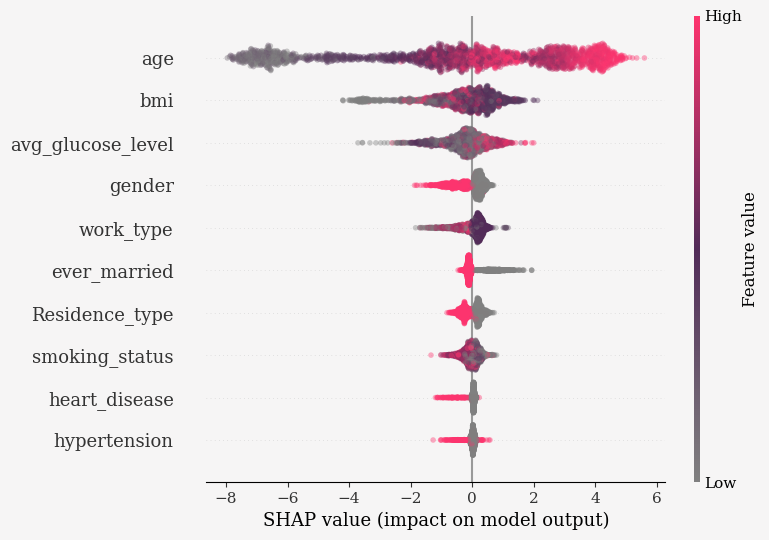

In [42]:
# SHAP implementation
import shap
shap.initjs()

# Initialize the explainer
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Customize font type
plt.rcParams['font.family'] = 'serif'

# Customize background color of the figure
plt.gcf().set_facecolor('#f6f5f5')

# Customize background color of the plot area (axes)
ax = plt.gca()
ax.set_facecolor('#f6f5f5')

# Summary plot
shap.summary_plot(shap_values, X_test, alpha=0.4,cmap=colormap)
# Show the plot
plt.show()

In [43]:
shap.force_plot(explainer.expected_value, shap_values.values, X_test)

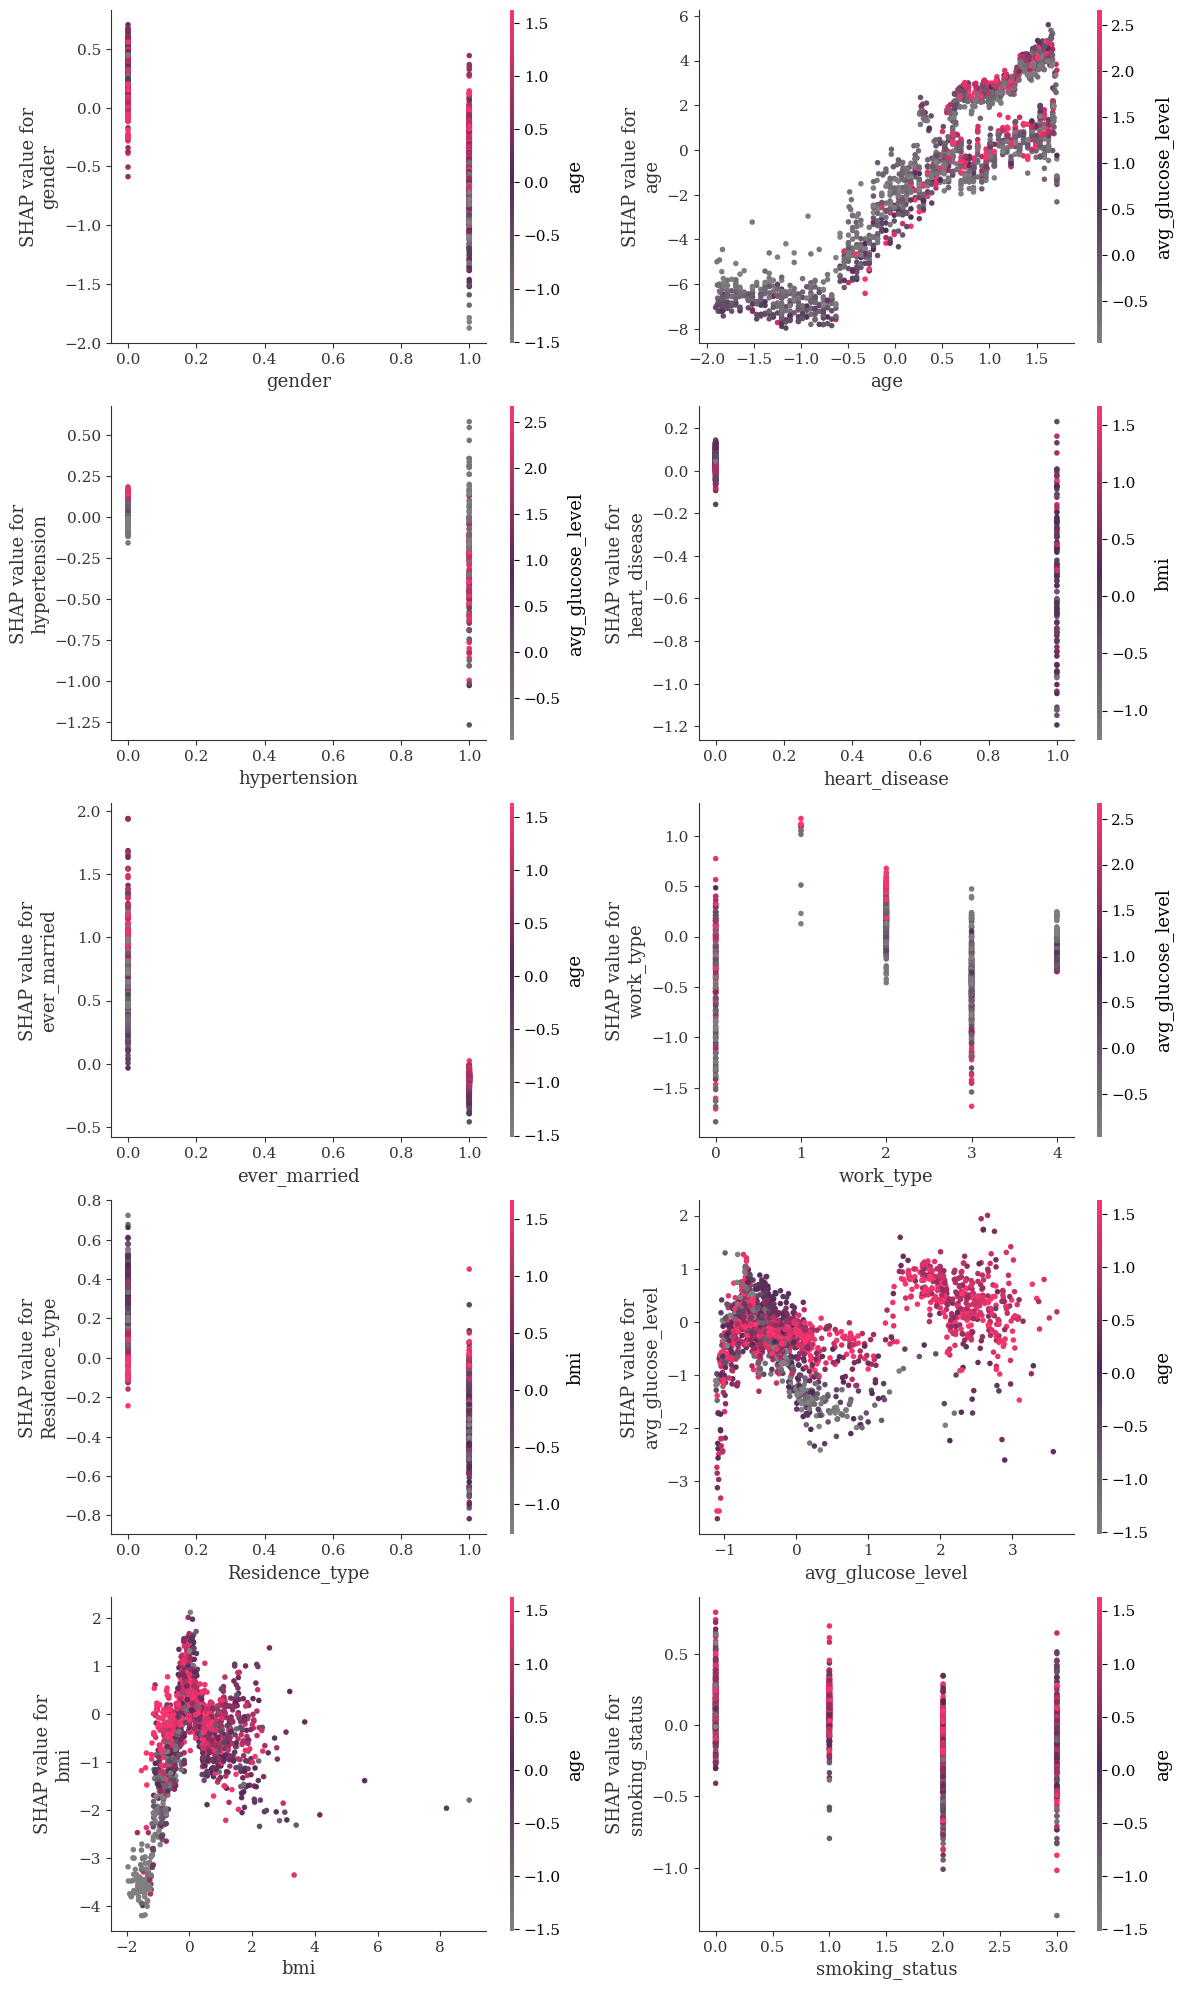

In [44]:
col_num = min(2, len(X_test.columns))
rows_num = (len(X_test.columns) + col_num - 1) // col_num

fig, axes = plt.subplots(nrows=rows_num, ncols=col_num, figsize=(6*col_num, 4 * rows_num))

for i, ind in enumerate(X_test.columns):
    row = i // col_num
    col = i % col_num
    shap.dependence_plot(ind, shap_values.values, X_test, ax=axes[row, col], feature_names=X_test.columns, show=False, cmap=colormap)

plt.tight_layout() 
plt.show()

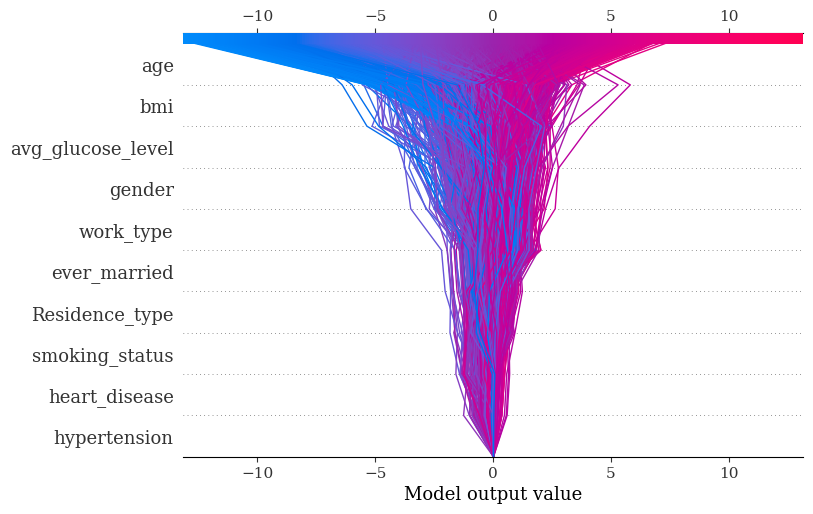

In [45]:
import shap

# Extract the first row of SHAP values and the corresponding instance from X_test
specific_shap_values = shap_values.values[100]
specific_instance = X_test.iloc[200]

# Create the decision plot for the specific row of X_test
# shap.decision_plot(explainer.expected_value, specific_shap_values, specific_instance)

# Create the decision plot for the specific row of X_test
shap.decision_plot(explainer.expected_value, shap_values.values, X_test)


<style>
.title{
  color: #fe346e;
  font-size: 25px;
  font-family: Sans-serif;
  /* padding: 15px; */
  justify-content: center;
  display: flex;
  max-width: 95%;
  margin:0 auto;
  /* height: 40px; */
  /* border-radius: 50px; */
  /* transition: top ease 0.5s; */
  overflow: hidden;
  position: relative;
  transition: top ease 0.5s;
  /* top: 5px; */
}
</style>
<div class="title">The End</div>